## ИССЛЕДОВАНИЕ РЫНКА КОМПЬЮТЕРНЫХ ИГР С 1980 ПО 2016 гг И ПОСТРОЕНИЕ ПРОГНОЗА РЕЛИЗОВ И ВЫРУЧКИ В 2017 г

 <b>  Цель исследования: на основании исторических данных о продажах игр различных жанров и на различных платформах за период до
2016 г., а также принимиая во внимание оценки пользователей и экспертов, выявить факторы и закономерности, определяющие 
успешность игры на рынке и построить прогноз количества релизов и выручки от продажи новых игр в 2017 г. </b>

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка таблицы с данными](#start)
2. [Подготовка данных к анализу](#start1)
3. [Исследовательский анализ данных](#start2)
4. [Определение актуального периода для прогноза продаж игр в 2017 году](#start4)
5. [Анализ релизов и выручки от актуальных платформ ](#start5)
6. [Распределение выручки от продажи игр на актуальных платформах ](#start6)
7. [Жанровая принадлежность игр на актуальных платформах ](#start7)
8. [Анализ потребительских предпочтений в различных регионах](#start8)
9. [Сравнение пользовательских рейтингов игр на платформах XOne и PC ](#start9)
10. [Сравнение пользовательских рейтингов игр жанров Action и Sports](#start10)
11. [Выводы](#start11)
12. [Прогноз релизов на игровом рынке в 2017 году](#start12)
13. [Прогноз выручки от новых релизов на игровом рынке в 2017 году](#start13)

<div class="alert alert-info">
  <b> ЗАГРУЗКА ТАБЛИЦЫ С ДАННЫМИ </b>
    <a id="start"></a> 
</div>

In [155]:
df = pd.read_csv('/datasets/games.csv')

In [156]:
df[:5]

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [158]:
d = [df[i].isna().sum() for i in df.columns]
d

[2, 0, 269, 2, 0, 0, 0, 0, 8578, 6701, 6766]

<div class="alert alert-info">
  Таблица с данными содержит 11 столцов и 16715 рядов. В ряде столбцов есть пропуски: 'Name' - 2 пропуска, 'Year_of_Release' -
269 пропусков, 'Genre' - 2 пропуска, 'Critic_Score' - 8578 пропусков, 'User_Score ' - 6701 пропуск и 'Rating' - 6766 пропусков.
Cтолбец 'User_Score' имеет неверный тип данных.
</div>

<div class="alert alert-info">
  <b> Подготовка данных к анализу </b>
    <a id="start1"></a> 
</div>

In [159]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [160]:
df.duplicated().sum()

0

In [161]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [162]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [163]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 100
len(df.loc[df['user_score'] == 100])

2424

In [164]:
df['user_score'] = df['user_score'].astype('float32')

In [165]:
df.query('user_score != 100')['critic_score'].corr(df.query('user_score != 100')['user_score'])

0.5808778289161957

In [166]:
df['user_score'] = df['user_score'].apply(lambda x: x*10)

In [167]:
df['user_score'].unique()

array([  80.        ,           nan,   83.00000191,   85.        ,
         65.99999905,   83.99999619,   86.00000381,   76.99999809,
         63.00000191,   74.00000095,   81.99999809,   90.        ,
         79.00000095,   81.00000381,   86.99999809,   70.99999905,
         34.00000095,   53.00000191,   48.00000191,   32.00000048,
         88.99999619,   64.00000095,   78.00000191,   75.        ,
         25.99999905,   71.99999809,   91.99999809,   70.        ,
         73.00000191,   43.00000191,   75.99999905,   56.99999809,
         50.        ,   91.00000381,   65.        , 1000.        ,
         88.00000191,   69.00000095,   93.99999619,   68.00000191,
         60.99999905,   66.99999809,   54.00000095,   40.        ,
         49.00000095,   45.        ,   93.00000191,   61.99999809,
         41.99999809,   60.        ,   37.00000048,   40.99999905,
         58.00000191,   55.99999905,   55.        ,   44.00000095,
         45.99999905,   59.00000095,   39.00000095,   30.99999

In [168]:
df['ratio'] = df.loc[df['user_score'] != 1000, 'user_score']/(df.loc[df['user_score'] != 1000, 'critic_score'])

In [169]:
df['ratio'].describe()

count    7017.000000
mean        1.042651
std         0.221392
min         0.083333
25%         0.929412
50%         1.025641
75%         1.141026
max         3.296296
Name: ratio, dtype: float64

In [170]:
f = df['platform'].unique()

In [171]:
df['mean_rat'] = df['ratio']
for i in f:
    df.loc[df['platform'] == i, 'mean_rat'] = df.loc[(df['platform'] == i) & (df['user_score'] != 1000), 'ratio'].mean()

In [172]:
df['crit'] = df['ratio']
for i in f:
    df.loc[df['platform'] == i, 'crit'] = df.loc[df['platform'] == i, 'critic_score'].mean()

In [173]:
df.loc[df['user_score'] == 1000, 'user_score'] = df.loc[df['user_score'] == 1000, 'mean_rat']*df.loc[df['user_score'] == 1000, 'crit']

<div class="alert alert-info">
  В столбце 'user_score' есть 2424 записи 'tbd' (ожидают оценки). Вместе с тем, коэффициенто корреляции оценок критиков и 
пользователей находится на довольно высоком уровне и составляет 0,58. Это позволяет примерно оценить неизвестное значение
столбца 'user_score', если известно значение столбца 'critic_score' (и наоборот). Для каждой записи было найдено соотношение
между соответствующими значениями столбцов 'user_score' и 'critic_score' (столбец 'ratio'). Значения столбца 'ratio' имеют 
небольшой разброс - среднее составляет 1,04, а медиана - 1,03, что свидетельствует о близости оценок критиков и пользователей.
Для каждой платформы были найдены средние значения столбца 'ratio' (столбец 'mean_rat'), а значения собца 'user_score' были 
приведены к типу 'float' и умножены на 10, чтобы соответствовать процентной оценки в столбце 'critic_score'. Также для каждой
платформы были найдены средние значения столбца 'critic_score' (солбец 'crit'). Затем значения в столбце 'user_score', 
соответствующие записям 'tbd', были заменены на произведения значений стобцов 'mean_rat' и 'crit'.
</div>

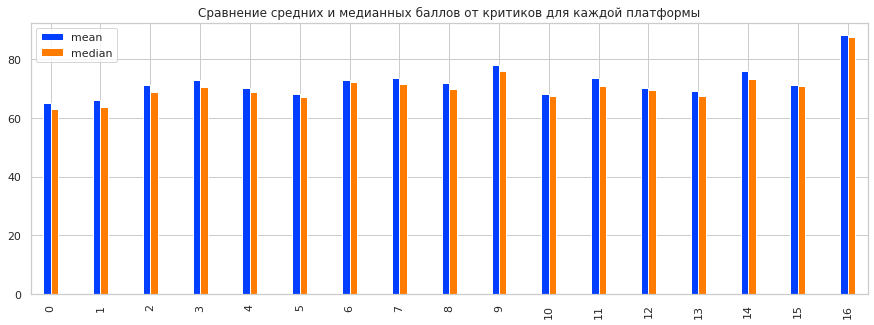

In [174]:
s = []
p = []
w = df.loc[df['critic_score'].notna(),'platform'].unique()
for i in w:
    s.append(df.loc[df['platform'] == i, 'critic_score'].mean())
    p.append(df.loc[df['platform'] == i, 'critic_score'].median())
ds = pd.DataFrame({'platform':w, 'mean':p, 'median':s})
ds.plot(kind='bar', width = 0.3, title = 'Сравнение средних и медианных баллов от критиков для каждой платформы',
                                             figsize=(15,5)); 

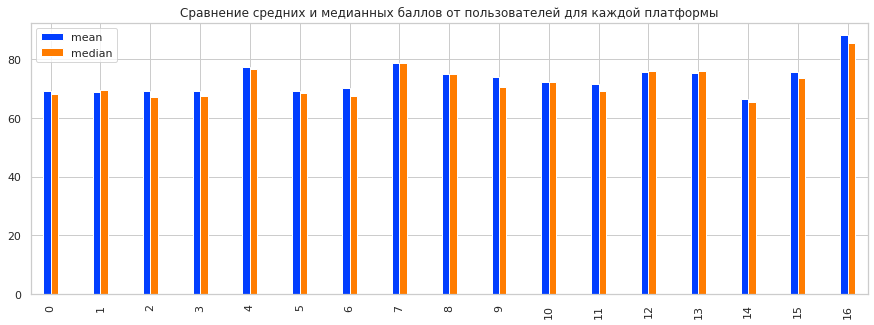

In [175]:
s1 = []
p1 = []
w1 = df.loc[df['user_score'].notna(),'platform'].unique()
for i in w1:
    s1.append(df.loc[df['platform'] == i, 'user_score'].mean())
    p1.append(df.loc[df['platform'] == i, 'user_score'].median())
ds1 = pd.DataFrame({'platform':w1, 'mean':p1, 'median':s1})
ds1.plot(kind='bar', width = 0.3, title = 'Сравнение средних и медианных баллов от пользователей для каждой платформы',
                                             figsize=(15,5)); 

<div class="alert alert-info">
  Сравнение средних и медианных баллов критиков и пользователей с разбивкой по платформам показывает, что в пределах одной 
платформы среднее и медианное значения баллов очень близки. Это означает, что в пределах одной платформы все значения в 
столбцах 'critic_score' и 'user_score' очень близки и имеют мало выбросов, что дает возможность заполнить пропуски данных 
средними значениями по каждой платформе.
</div>

In [176]:
df.loc[df['user_score'].isna(), 'user_score'] = df['mean_rat']*df['crit']

In [177]:
df['user_score'].isna().sum()

1120

In [178]:
df.loc[df['critic_score'].isna(), 'critic_score'] = df['crit']

In [179]:
df['critic_score'].isna().sum()

1120

In [180]:
set1 = set(df.loc[df['critic_score'].isna(), 'platform'].unique())
set2 = set(df.loc[df['critic_score'].notna(), 'platform'].unique())
len(set1), len(set2)

(14, 17)

In [181]:
set1.intersection(set2)

set()

<div class="alert alert-info">
  Так как в пределах платформы значения в столбцах 'critic_score' и 'user_score' имеют небольшой разброс и близки к среднему, то
пропуски данных были заполнены соответствующими средними значениями для каждой платформы. Вместе с тем, остается 14 платформ,
для которых не известны оценочные данные критиков и пользователей, что обуславливает остаточное количество пропусков (1120) 
в столбцах 'critic_score' и 'user_score', которые соответствуют этим 14 неоцененным платформам. 
</div>

In [182]:
set3 = set(df.loc[df['rating'].notna(), 'platform'].unique())
len(set3)

17

In [183]:
len(set3.intersection(set1))

0

In [184]:
len(set3.intersection(set2))

17

<div class="alert alert-info">
   Только 17 платформ имеют оценки в столбце 'rating'. Остальные 14 платформ с неизвестными оценками в столбцах 'critic_score' 
и 'user_score' не имеют также рейтинговых данных в столбце 'rating'.
</div>

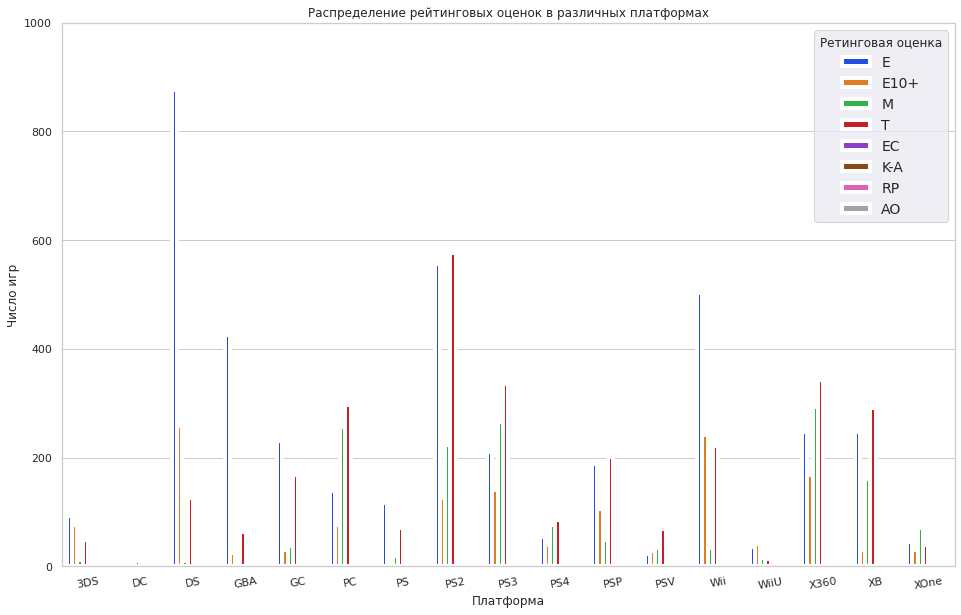

In [185]:
de = df.loc[df['rating'].notna()].groupby(['platform', 'rating'], as_index = False).agg({'name':'count'})
ax = sns.barplot(x = 'platform', y = 'name', data = de, hue = 'rating', linewidth = 4)
sns.set(rc={'figure.figsize':(20,8)})
sns.set_palette('bright')
ax.set (xlabel='Платформа', ylim = (0,1000),
        ylabel='Число игр',
        title='Распределение рейтинговых оценок в различных платформах')
plt.legend(loc = 'upper right', title = 'Ретинговая оценка', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
   На 17 платформах, для которых в таблице присутствуют рейтинговые оценки, распределение рейтинга носит неравномерный характер,
преобладают оценки Е, Т, Е10+ и М. 
</div>

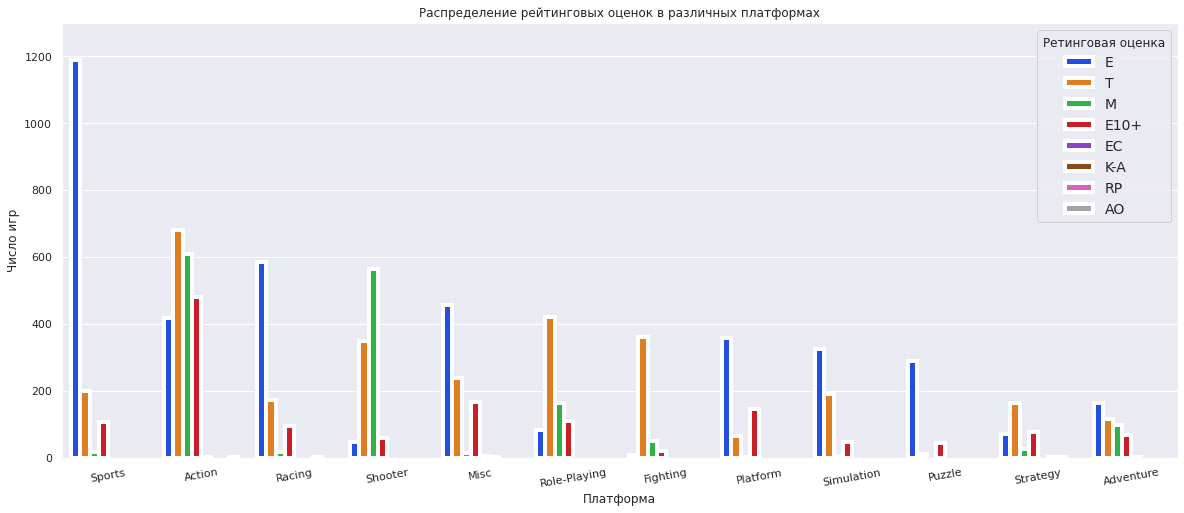

In [186]:
dg = df.loc[df['rating'].notna()].groupby(['genre', 'rating'], as_index = False).agg({'name':'count'}).sort_values(by = 'name', ascending = False)
ax = sns.barplot(x = 'genre', y = 'name', data = dg, hue = 'rating', linewidth = 4)
sns.set(rc={'figure.figsize':(20,8)})
sns.set_palette('bright')
ax.set (xlabel='Платформа', ylim = (0,1300),
        ylabel='Число игр',
        title='Распределение рейтинговых оценок в различных платформах')
plt.legend(loc = 'upper right', title = 'Ретинговая оценка', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
   В каждом жанре присутствуют игры с различным рейтингом. В некоторых жанрах определенный рейтинг доминирует, оо есть, более 
80% игр обладают доминирующим рейтингом: в жанрах Sports, Racing и Puzzle доминирует рейтинг E, а в жанре Fighting доминирует
рейтинг Т. Соответственно, появляется возможность заполнить пропуски в столбце 'rating' для игр с доминирующим жанром, так 
как вероятная ошибка будет относительно невелика. 
</div>

In [187]:
for i in ['Sports', 'Racing', 'Puzzle']:
    df.loc[(df['genre'] == i) & (df['rating'].isna()), 'rating'] = 'E'
df.loc[(df['genre'] == 'Fighting') & (df['rating'].isna()), 'rating'] = 'T'
df['rating'].isna().sum()

4901

<div class="alert alert-info">
   Врезультате заполнения столбца 'rating' для игр, относящихся к жанрам с доминирующим рейтингом, удалось снизить число
пропусков в данном столбце с 6766 до 4901. Однако, оставшиеся пропуски не удается заполнить, так как данные игры не относятся 
к жанрам, имеющим доминирующий рейтинг, и вероятная ошибка при присвоении им определенного рейтинга будет недопустимо большой. 
</div>

In [188]:
df.drop(['ratio', 'mean_rat', 'crit'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     15595 non-null  float64
 9   user_score       15595 non-null  float64
 10  rating           11814 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-info">
   Таким образом, часть пропусков в столбцах 'critic_score' и 'user_score', а также заменить записи 'tbd' в столбце 
'user_score' реальными значениями, исходя из наличия взаимной корреляции между имеющимися данными в столбцах 'critic_score' и 
'user_score', а также отсутствия большого разброса значений оценок критиков и пользователей в рамках различных платформ.
Оставшиеся пропуски в столбцах 'critic_score' и 'user_score' приурочены к платформам, которые не имеют оценок ни критиков,
ни пользователей. Часть пропусков в столбце 'rating' удается заполнить, исходя из преобладающего рейтинга в жанре, к которому
эти игры относятся. Остаются незаполненными также пропуски в столбце 'year_of_release' с неизвестными годами выхода игр. 
</div>

In [189]:
#df['sales_total'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [190]:
df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     15595 non-null  float64
 9   user_score       15595 non-null  float64
 10  rating           11814 non-null  object 
 11  sales_total      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


<div class="alert alert-info">
   Создан новый столбец 'sales_total', содержащий информацию о суммарных продажах игр в разных регионах. 
</div>

<div class="alert alert-info">
   <b> Результаты предобработки данных </b>
      
   Таблица с данными содержит 11 столцов и 16715 рядов. В ряде столбцов есть пропуски: 'Name' - 2 пропуска, 'Year_of_Release' -
269 пропусков, 'Genre' - 2 пропуска, 'Critic_Score' - 8578 пропусков, 'User_Score ' - 6701 пропуск и 'Rating' - 6766 пропусков.
Cтолбец 'User_Score' имеет неверный тип данных.
     В столбце 'user_score' есть 2424 записи 'tbd' (ожидают оценки). Вместе с тем, коэффициенто корреляции оценок критиков и 
пользователей находится на довольно высоком уровне и составляет 0,58. Это позволяет примерно оценить неизвестное значение
столбца 'user_score', если известно значение столбца 'critic_score' (и наоборот). Для каждой записи было найдено соотношение
между соответствующими значениями столбцов 'user_score' и 'critic_score' (столбец 'ratio'). Значения столбца 'ratio' имеют 
небольшой разброс - среднее составляет 1,04, а медиана - 1,03, что свидетельствует о близости оценок критиков и пользователей.
Для каждой платформы были найдены средние значения столбца 'ratio' (столбец 'mean_rat'), а значения собца 'user_score' были 
приведены к типу 'float' и умножены на 10, чтобы соответствовать процентной оценки в столбце 'critic_score'. Также для каждой
платформы были найдены средние значения столбца 'critic_score' (солбец 'crit'). Затем значения в столбце 'user_score', 
соответствующие записям 'tbd', были заменены на произведения значений стобцов 'mean_rat' и 'crit'.
     Сравнение средних и медианных баллов критиков и пользователей с разбивкой по платформам показывает, что в пределах одной 
платформы среднее и медианное значения баллов очень близки. Это означает, что в пределах одной платформы все значения в 
столбцах 'critic_score' и 'user_score' очень близки и имеют мало выбросов, что дает возможность заполнить пропуски данных 
средними значениями по каждой платформе.
     Так как в пределах платформы значения в столбцах 'critic_score' и 'user_score' имеют небольшой разброс и близки к среднему, то
пропуски данных были заполнены соответствующими средними значениями для каждой платформы. Вместе с тем, остается 14 платформ,
для которых не известны оценочные данные критиков и пользователей, что обуславливает остаточное количество пропусков (1120) 
в столбцах 'critic_score' и 'user_score', которые соответствуют этим 14 неоцененным платформам.  Только 17 платформ имеют оценки в столбце 'rating'. Остальные 14 платформ с неизвестными оценками в столбцах 'critic_score' 
и 'user_score' не имеют также рейтинговых данных в столбце 'rating'. На 17 платформах, для которых в таблице присутствуют рейтинговые оценки, распределение рейтинга носит неравномерный характер,
преобладают оценки Е, Т, Е10+ и М. 
      В каждом жанре присутствуют игры с различным рейтингом. В некоторых жанрах определенный рейтинг доминирует, оо есть, более 
80% игр обладают доминирующим рейтингом: в жанрах Sports, Racing и Puzzle доминирует рейтинг E, а в жанре Fighting доминирует
рейтинг Т. Соответственно, появляется возможность заполнить пропуски в столбце 'rating' для игр с доминирующим жанром, так 
как вероятная ошибка будет относительно невелика. 
     В результате заполнения столбца 'rating' для игр, относящихся к жанрам с доминирующим рейтингом, удалось снизить число
пропусков в данном столбце с 6766 до 4901. Однако, оставшиеся пропуски не удается заполнить, так как данные игры не относятся 
к жанрам, имеющим доминирующий рейтинг, и вероятная ошибка при присвоении им определенного рейтинга будет недопустимо большой.
     Таким образом, часть пропусков в столбцах 'critic_score' и 'user_score', а также заменить записи 'tbd' в столбце 
'user_score' реальными значениями, исходя из наличия взаимной корреляции между имеющимися данными в столбцах 'critic_score' и 
'user_score', а также отсутствия большого разброса значений оценок критиков и пользователей в рамках различных платформ.
Оставшиеся пропуски в столбцах 'critic_score' и 'user_score' приурочены к платформам, которые не имеют оценок ни критиков,
ни пользователей. Часть пропусков в столбце 'rating' удается заполнить, исходя из преобладающего рейтинга в жанре, к которому
эти игры относятся. Остаются незаполненными также пропуски в столбце 'year_of_release' с неизвестными годами выхода игр. 
</div>

<div class="alert alert-info">
  <b> Исследовательский анализ данных </b>
    <a id="start2"></a> 
</div>

In [192]:
df['year_of_release'] = df['year_of_release'].astype(float).astype('Int32')

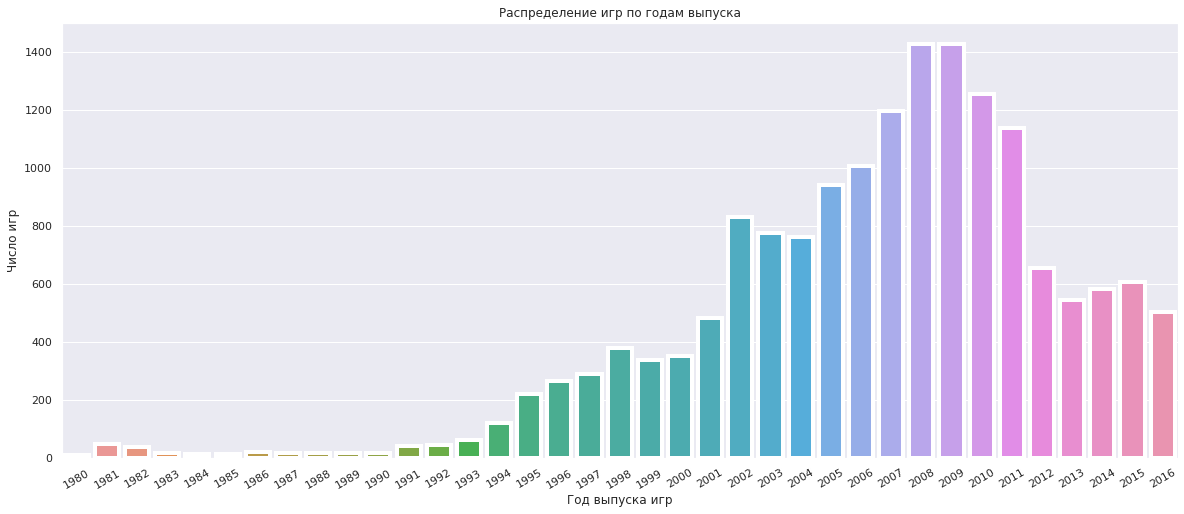

In [193]:
dy = df.groupby(['year_of_release'], as_index = False).agg({'name':'count'}).sort_values(by = 'name', ascending = True)
ax = sns.barplot(x = 'year_of_release', y = 'name', data = dy, linewidth = 4)
sns.set(rc={'figure.figsize':(20,8)})
sns.set_palette('bright')
ax.set (xlabel='Год выпуска игр', ylim = (0,1500),
        ylabel='Число игр',
        title='Распределение игр по годам выпуска')
#plt.legend(loc = 'upper right', title = 'Платформа', fontsize = 14)
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
   Количество выпускаемых игр начало активно расти с 1990 года, начиная с которого число игр постепенно увеличивалось, достигнув
максимума (1400 игр/год) в 2007 и 2008 годах. В период 2009 - 2012 гг ежегодно выпускаемое число новых игр сократилось почти в 2
раза (около 600) и оставалось примерно на одном уровне (550 - 600) вплоть до 2016 г. 
</div>

In [194]:
dfn = df.query('platform == "NES"')
dfny = dfn.groupby('year_of_release', as_index = False).agg({'name':'count'})
dfny = dfny.rename(columns={'name': 'NES'})

In [195]:
for i in df.loc[df['platform'] != 'NES']['platform'].unique():
    dfi = df.loc[df['platform'] == i]
    dfij = dfi.groupby('year_of_release', as_index = False).agg({'name':'count'})
    dfij = dfij.rename(columns={'name': i})
    dfny = dfny.merge(dfij, on = 'year_of_release', how = 'outer')

In [196]:
dfx = dfny.groupby('year_of_release').mean()
dfx = dfx. fillna (0)

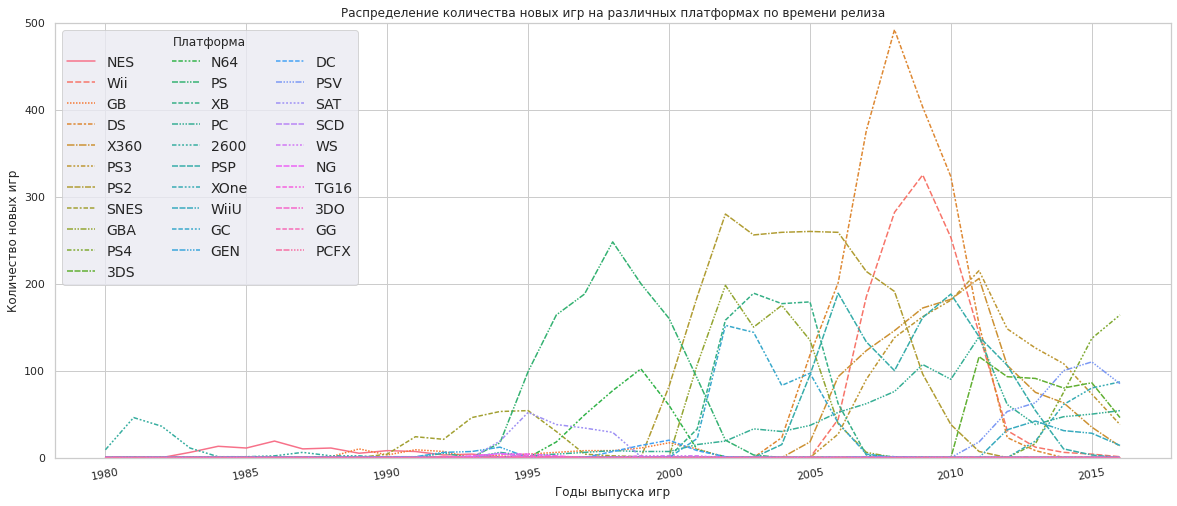

In [197]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.lineplot(data=dfx)
sns.set(rc={'figure.figsize':(18,18)})
ax.set (xlabel='Годы выпуска игр', ylim = (0,500),
        ylabel='Количество новых игр',
        title='Распределение количества новых игр на различных платформах по времени релиза')
plt.legend(loc = 'upper left', ncol = 3, title = 'Платформа', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
   Из графика распределения количиства новых игр по платформам и годам релиза видно, что каждая платформа проходит цикл роста,
пика и спада полулярности, что выражается в экстремальном характере зависимости суммарного количества новых игр от года релиза. 
'Время жизни' каждой платформы составляет 5 - 15 лет, есть популярные платформы, на пике популярности которых выходило от 100 до
500 игр и непопулярные платформы, пиковое количество игр на которых не превышало 100 релизов. Для детального анализа графика 
необходимо выделить наиболее популярные платформы с общим количеством новых игр более 800.
</div>

In [198]:
dfm = df.groupby('platform', as_index = False).agg({'name':'count'}).sort_values(by = 'name', ascending = False)

In [199]:
w = list(dfm.query('name > 800')['platform'])
dfw = df.loc[df['platform'].isin(w)]
dfw['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS', 'XB', 'PC', 'PSP'],
      dtype=object)

In [200]:
dfn = dfw.query('platform == "Wii"')
dfny = dfn.groupby('year_of_release', as_index = False).agg({'name':'count'})
dfny = dfny.rename(columns={'name': 'Wii'})

In [201]:
for i in dfw.loc[df['platform'] != 'Wii']['platform'].unique():
    dfi = dfw.loc[df['platform'] == i]
    dfij = dfi.groupby('year_of_release', as_index = False).agg({'name':'count'})
    dfij = dfij.rename(columns={'name': i})
    dfny = dfny.merge(dfij, on = 'year_of_release', how = 'outer')

In [202]:
dfx = dfny.groupby('year_of_release').mean()
dfx = dfx. fillna (0)

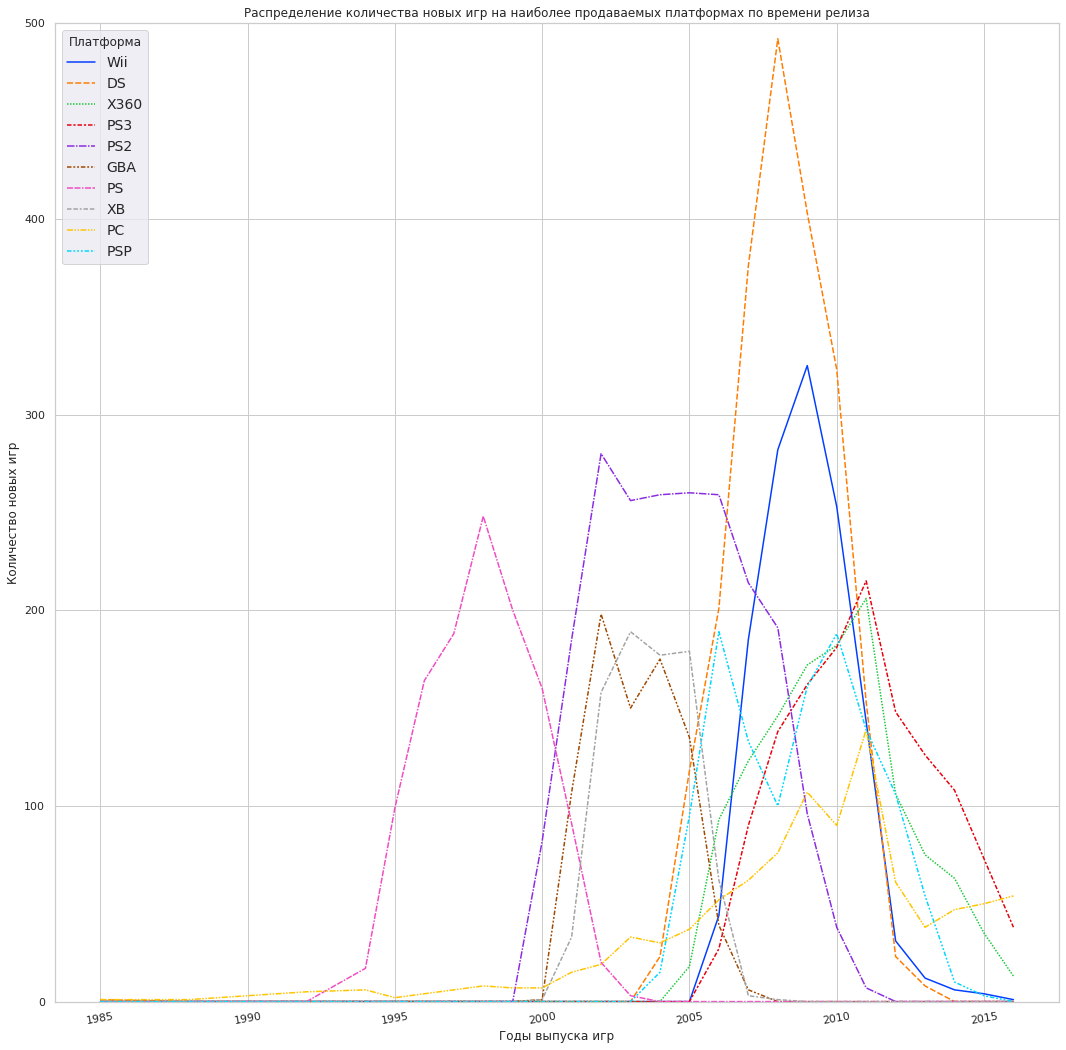

In [203]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.lineplot(data=dfx)
sns.set(rc={'figure.figsize':(18,18)})
ax.set (xlabel='Годы выпуска игр', ylim = (0,500),
        ylabel='Количество новых игр',
        title='Распределение количества новых игр на наиболее продаваемых платформах по времени релиза')
plt.legend(loc = 'upper left', title = 'Платформа', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
   Выделение 10 платформ с наибольшим количеством релизов позволяет более отчетливо получить представление о периодах 
активности платформ, каждая из которых имеет свой жизненный цикл, состоящий из увеличения числа релизом, достижения максимума и
дальнейшего снижжения числа ежегодно выходящих новых игр до нуля. Все платформы-лидеры к 2016 г имеют угосающую популярность.
Новые игры после 2015 г продолжают выходить только на платформах PS3, PC и X360. Так как наиболее платформы с наиболее 
продаваемыми играми находятся к 2016 г в упадке, то нельзя исключать из анализа остальные платформы, которые не имеют к 2016 г
большого количества релизов, но могут находиться в стадии роста популярности.
</div>

In [204]:
dfs = df.groupby('platform', as_index = False).agg({'sales_total':'sum'}).sort_values(by = 'sales_total', ascending = False)

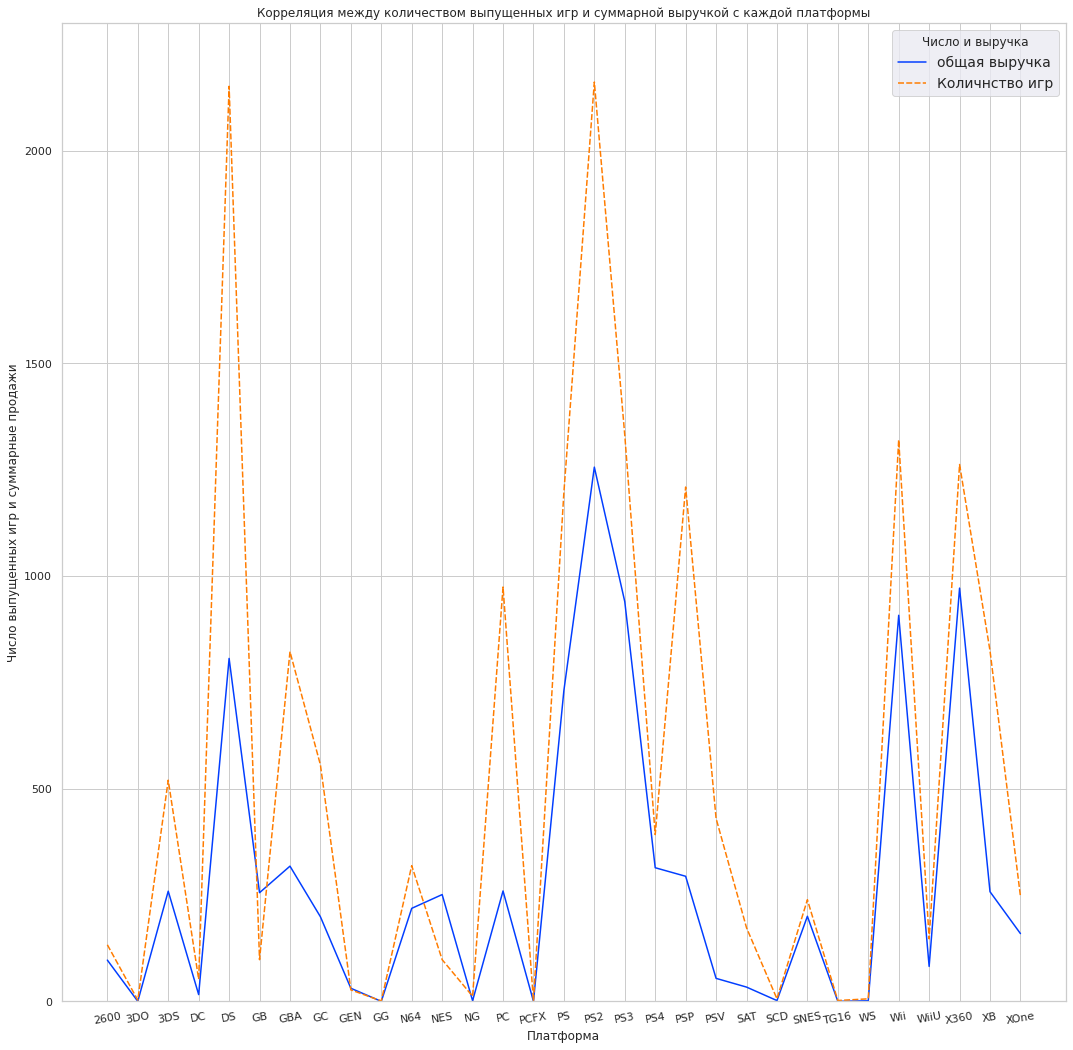

In [205]:
dfa = dfs.merge(dfm, on = 'platform', how = 'outer')
df_a = dfa.groupby('platform').agg({'sales_total':'max','name':'max'}).rename(columns={'name': 'Количнство игр', 'sales_total':'общая выручка'})
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.lineplot(data=df_a)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Платформа', ylim = (0,2300),
        ylabel='Число выпущенных игр и суммарные продажи',
        title='Корреляция между количеством выпущенных игр и суммарной выручкой с каждой платформы')
plt.legend(loc = 'upper right', title = 'Число и выручка', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

In [206]:
dfa['name'].corr(dfa['sales_total'])

0.9003437510505747

<div class="alert alert-info">
   Для платформ установлена прямопропорциональная корреляция между числом выпущенных игр и общей выручкой (коэф корреляции 
равен 0,9). Таким образом, не смотря на разную стоимость игр, увеличение числа релизов обеспечивает  также увеличение объемов
ваыручки от продажи игр.
</div>

In [207]:
w = list(df.query('year_of_release >= 2014')['platform'])
dfw = df.loc[df['platform'].isin(w)]
df_m = dfw.groupby('platform', as_index = False).agg({'name':'count'}).sort_values(by='name', ascending = False)
df_m['percent'] = df_m['name']*100/df_m['name'].sum()

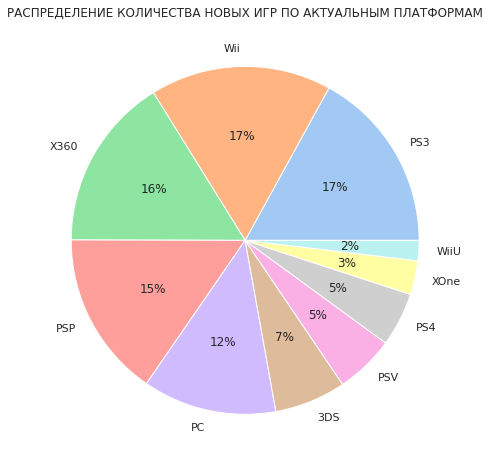

In [208]:
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')
labels = list(df_m['platform'])
plt.pie(list(df_m['percent']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА НОВЫХ ИГР ПО АКТУАЛЬНЫМ ПЛАТФОРМАМ')
plt.show()

<div class="alert alert-info">
   Среди актуальных платформ, имеющих релизы в 2016 г., наибольшее число новых игр вышло на PS3, Wii и X360. Меньше всего игр 
вышло на платформе WiiU. 
</div>

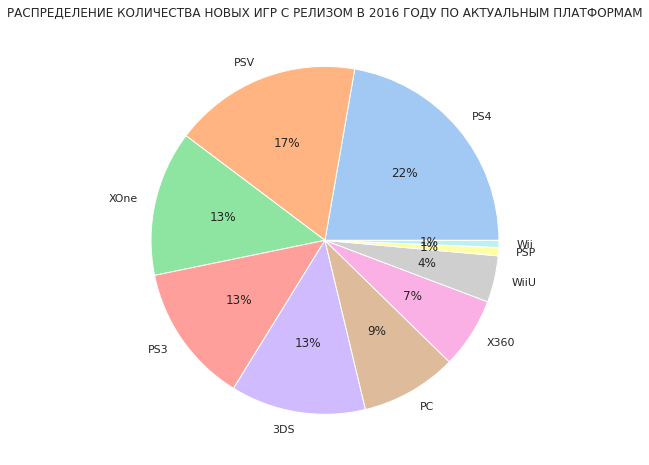

In [209]:
df_m = dfw.query('year_of_release >= 2014').groupby('platform', as_index = False).agg({'name':'count'}).sort_values(by='name', ascending = False)
df_m['percent'] = df_m['name']*100/df_m['name'].sum()
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')
labels = list(df_m['platform'])
plt.pie(list(df_m['percent']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА НОВЫХ ИГР С РЕЛИЗОМ В 2016 ГОДУ ПО АКТУАЛЬНЫМ ПЛАТФОРМАМ')
plt.show()

<div class="alert alert-info">
   В 2014 - 1016 гг более 20 % игр вышло на платформе PS4, а 2 и 3 местях были платформы XOne и PSV (по 17 м 13 %) , далее PS,
PC и SDS (13, 13 и 11 %). Остальные платформы выпустили менее 25 % релизов.
</div>

In [210]:
dfq = df.query('year_of_release >= 2014')
er = list(dfq['platform'].unique())

In [211]:
ww = []
for i in df.loc[~df['platform'].isin(dfq['platform']), 'platform'].unique():
    dfr = df.loc[(df['platform'] == i) & (df['year_of_release'].notna())]
    ww.append(len(dfr['year_of_release'].unique()))
ww, np.median(ww)

([12, 13, 11, 12, 10, 8, 7, 10, 9, 10, 7, 5, 7, 6, 2, 3, 4, 1, 2, 1, 1], 7.0)

<div class="alert alert-info">
   Для оценки 'жизненного цикла' платформ (период, когда появляются новые релизы) были отфильтрованы платформы, еще имеющие 
релизы в 2015 г, так как у платформ с новыми релизами в 2015 г период жизни еще скорее всего не закончен (данные за 2016 г
неполные). Жизненный цикл платформ, не имеющих релизов в 2015 г, изменяется в широких пределах от 1 до 12 лет. Медианный
жизненный цикл платформы составляет 7 лет.
</div>

<div class="alert alert-info">
  <b> Определение актуального периода для прогноза продаж игр в 2017 году </b>
    <a id="start4"></a> 
</div>

In [212]:
dfq = df.query('year_of_release >= 2015')
er = list(dfq['platform'].unique())

In [213]:
ww = []
p = []
for i in df.loc[df['platform'].isin(dfq['platform']), 'platform'].unique():
    dfr = df.loc[(df['platform'] == i) & (df['year_of_release'].notna())]
    ww.append(len(dfr['year_of_release'].unique()))
    p.append(i)
ww, np.median(ww), p 

([11, 12, 11, 4, 6, 26, 12, 4, 5, 6],
 8.5,
 ['Wii', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'PSP', 'XOne', 'WiiU', 'PSV'])

<div class="alert alert-info">
   Если предположить, что основные продажи игр с данной платформы происходят в основном в период ее жизненного цикла (период 
времени, когда на этой платформе выходят релизы игр), то для прогноза продаж на 2017 год имеют значения, только те платформы,
жизненный цикл которых еще продалжается в 2016 г. Так как данные за 2016 г неполные, то для прогноза подойдут платформы,
жизненный цикл которых не был закончен в 2015 г. Таких платформ всего 10, и их максимальный предыдущий период жизни составляет
12 лет, медианный жизненный цикл - 8,5 лет. Таким образом, для прогноза продаж в 2017 г имеет значение период с 2004 по 2016 гг.
(12 лет). 
</div>

<div class="alert alert-info">
  <b> Анализ релизов и выручки от актуальных платформ </b>
    <a id="start5"></a> 
</div>

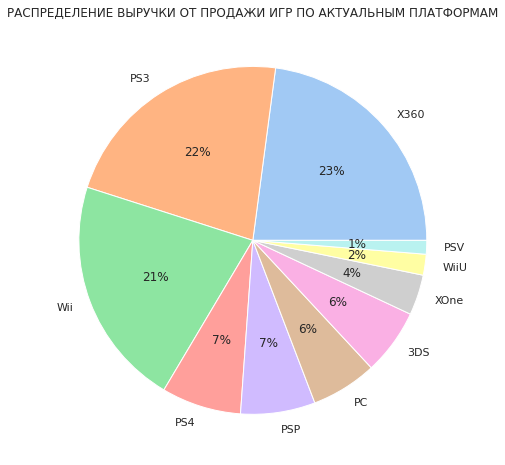

In [214]:
df_m = dfw.groupby('platform', as_index = False).agg({'sales_total':'sum'}).sort_values(by='sales_total', ascending = False)
df_m['percent'] = df_m['sales_total']*100/df_m['sales_total'].sum()
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')
labels = list(df_m['platform'])
plt.pie(list(df_m['percent']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ ВЫРУЧКИ ОТ ПРОДАЖИ ИГР ПО АКТУАЛЬНЫМ ПЛАТФОРМАМ')
plt.show()

<div class="alert alert-info">
    Среди актуальных платформ, имеющих релизы в 2016 г., наибольшая выручка приходится на X360, PS3 и Wii (25, 24 и 23 %).
Доля остальных платформ в выручке составила чуть более 25 %.
</div>

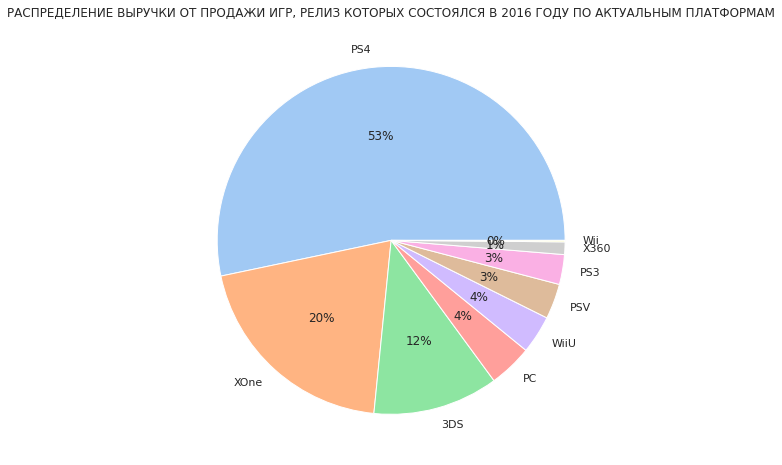

In [215]:
df_m = dfw.query('year_of_release == 2016').groupby('platform', as_index = False).agg({'sales_total':'sum'}).sort_values(by='sales_total', ascending = False)
df_m['percent'] = df_m['sales_total']*100/df_m['sales_total'].sum()
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')
labels = list(df_m['platform'])
plt.pie(list(df_m['percent']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ ВЫРУЧКИ ОТ ПРОДАЖИ ИГР, РЕЛИЗ КОТОРЫХ СОСТОЯЛСЯ В 2016 ГОДУ ПО АКТУАЛЬНЫМ ПЛАТФОРМАМ')
plt.show()

<div class="alert alert-info">
    Для игр, выпущенных в 2016 г., наибольшая выручка (более 50 %) приходится на платформу PS4, далее идут XOne и 3DS (20 и 12 %).
Остальные платформы по величине выручки занимают менее 20 %. 
</div>

In [216]:
w = list(df.query('year_of_release >= 2015')['platform'])
dfw = df.loc[df['platform'].isin(w)]
dfn = dfw.query('platform == "Wii"')
dfny = dfn.groupby('year_of_release', as_index = False).agg({'name':'count'})
dfny = dfny.rename(columns={'name': 'Wii'})

In [217]:
for i in dfw.loc[df['platform'] != 'Wii']['platform'].unique():
    dfi = dfw.loc[df['platform'] == i]
    dfij = dfi.groupby('year_of_release', as_index = False).agg({'name':'count'})
    dfij = dfij.rename(columns={'name': i})
    dfny = dfny.merge(dfij, on = 'year_of_release', how = 'outer')

In [218]:
dfx = dfny.groupby('year_of_release').mean()
dfx = dfx. fillna (0)

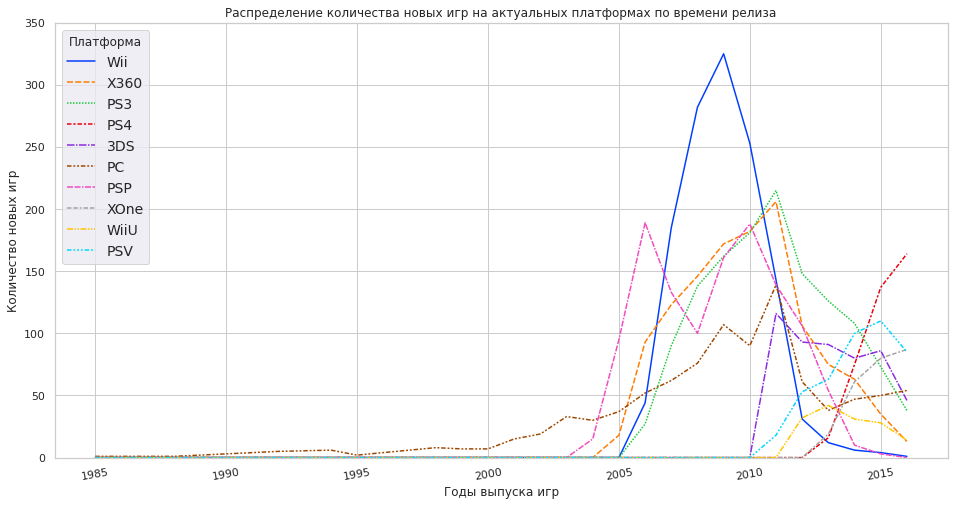

In [219]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.lineplot(data=dfx)
sns.set(rc={'figure.figsize':(18,8)})
ax.set (xlabel='Годы выпуска игр', ylim = (0,350),
        ylabel='Количество новых игр',
        title='Распределение количества новых игр на актуальных платформах по времени релиза')
plt.legend(loc = 'upper left', title = 'Платформа', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
   Распределение количества релизов игр на актуальных после 2015 года платформах показывает, что из 10 платформ 6 находятся 
в понижающей фазе жизненного цикла (PSP, Wii, WiiU, 3DS, PS3, X360), платформа PSV находится на пике, а платформа PC, не смотря
на общий спад релизов, начиная с 2013 года, вышла на плато по числу релизов. Платформы PS4 и XOne находятся в фазе роста 
числа релизов.
</div>

In [220]:
w = list(df.query('year_of_release >= 2015')['platform'])
dfw = df.loc[df['platform'].isin(w)]
dfn = dfw.query('platform == "Wii"')
dfny = dfn.groupby('year_of_release', as_index = False).agg({'sales_total':'sum'})
dfny = dfny.rename(columns={'sales_total': 'Wii'})

In [221]:
for i in dfw.loc[df['platform'] != 'Wii']['platform'].unique():
    dfi = dfw.loc[df['platform'] == i]
    dfij = dfi.groupby('year_of_release', as_index = False).agg({'sales_total':'sum'})
    dfij = dfij.rename(columns={'sales_total': i})
    dfny = dfny.merge(dfij, on = 'year_of_release', how = 'outer')

In [222]:
dfx = dfny.groupby('year_of_release').mean()
dfx = dfx.fillna (0)

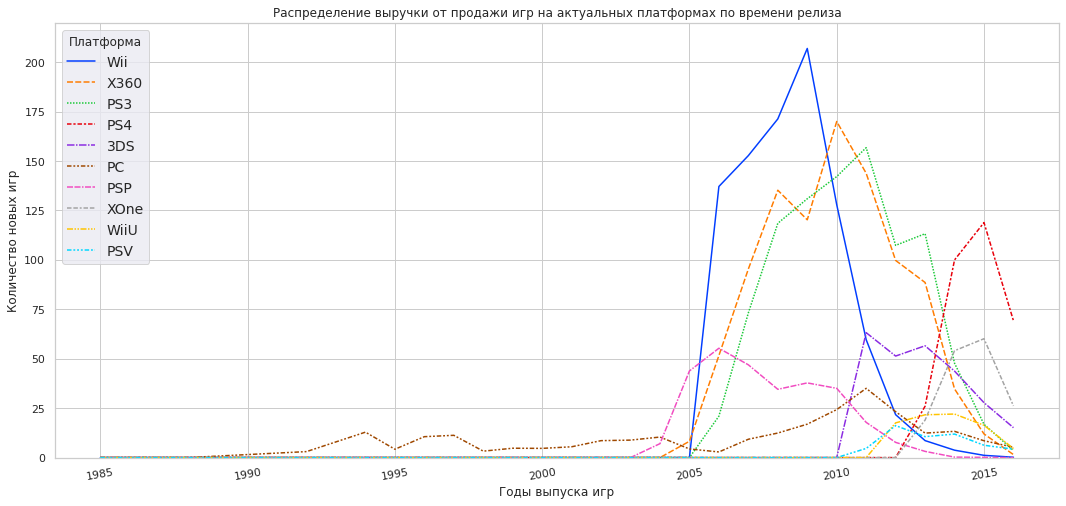

In [223]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.lineplot(data=dfx)
sns.set(rc={'figure.figsize':(18,8)})
ax.set (xlabel='Годы выпуска игр', ylim = (0,220),
        ylabel='Количество новых игр',
        title='Распределение выручки от продажи игр на актуальных платформах по времени релиза')
plt.legend(loc = 'upper left', title = 'Платформа', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
   Если полагать, что наибольшая выручка от игры концентрируется в год ее релиза, то распределение общей выручки от продажи игр
на актуальных платформах по времени релиза, в общем, коррелирует с количеством релизов, но также есть некоторые различия:
выручка от платформ PS4 и XOne, находящихся в нарастающей фазе по числу релизов, достигает максимума в 2015 г, а уже в 2016 г 
заметно понижается. Остальные 8 платформ (PSP, Wii, WiiU, 3DS, PS3, X360, PC и PSV), не смотря на пиковое число релизов на 
платформе PSV в 2015 г и плато, на которое вышли релизы на платформе PC, тем не мепнее к 2015 году находятся на стадии снижения
выручки.
</div>

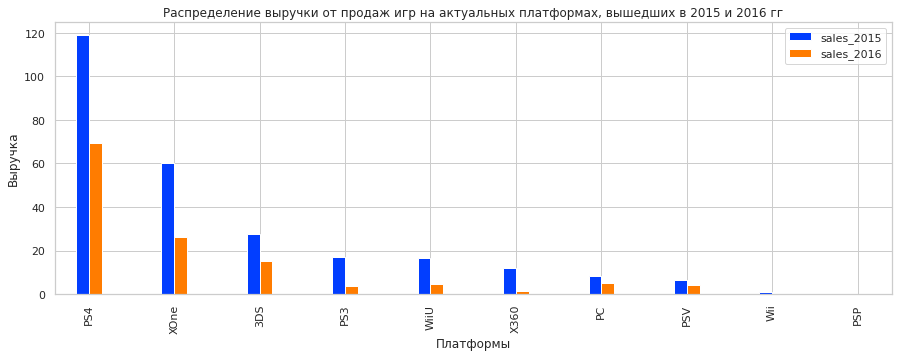

In [224]:
df15 = df.query('year_of_release == 2015').groupby(['platform'],
                             as_index = False).agg({'sales_total':'sum'}).sort_values(by = 'sales_total', ascending = False)
df16 = df.query('year_of_release == 2016').groupby(['platform'],
                             as_index = False).agg({'sales_total':'sum'}).sort_values(by = 'sales_total', ascending = False)
df15 = df15.rename(columns={'sales_total': 'sales_2015'})
df16 = df16.rename(columns={'sales_total': 'sales_2016'})
dft = df15.merge(df16, on = 'platform', how = 'outer')
dft = dft.groupby('platform').mean().sort_values(by = 'sales_2015', ascending = False)
dft = dft.fillna (0)
sns.set_style('whitegrid')
sns.set_palette('bright')
dft.plot(kind='bar', width = 0.3, title = 'Распределение выручки от продаж игр на актуальных платформах, вышедших в 2015 и 2016 гг',
                                             figsize=(15,5))
plt.xlabel("Платформы")
plt.ylabel("Выручка"); 

<div class="alert alert-info">
  Полагая, что практически вся выручка от продажти игры собирается в год ее релиза, можно констатировать падение выручки от 
продажи игр на всех актуальных платформах. В 2016 г новые игры на платформе PSP не выходили и, соответственно, ее можно 
исключить из числа актуальных для прогноза выручки в 2017 г.
</div>

<div class="alert alert-info">
  <b> Распределение выручки от продажи игр на актуальных платформах </b>
    <a id="start6"></a> 
</div>

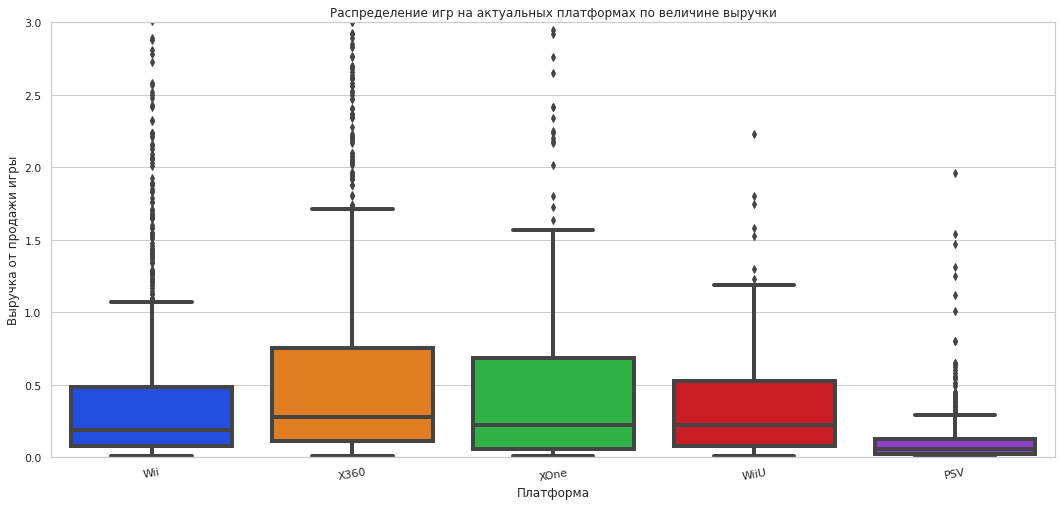

In [225]:
w = list(df.query('year_of_release >= 2016').groupby('platform', as_index = False).agg({'name':'count'}).sort_values(by = 'platform', ascending = False)['platform'])[:5]
dfw = df.loc[df['platform'].isin(w)]
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(x = 'platform', y = 'sales_total', data = dfw.sort_values(by = 'sales_total', ascending = False), linewidth = 4)
sns.set(rc={'figure.figsize':(16,8)})
ax.set (xlabel='Платформа', ylim = (0,3),
        ylabel='Выручка от продажи игры',
        title='Распределение игр на актуальных платформах по величине выручки')  

plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info">
  Медианная выручка от продажи игр для всех актуальных платформ не првыешает 0,5. Вместе с тем, все платформы имеют большое 
количество игр, выручка от продаши которых в десятки раз больше медианной. Самая снизкая медианная выручка от продажи игр на 
платформах PC и PSV, а самая высокая медианная выручка - от игр на платформе X360 и XOne, которые являются лидерами по общей
выручке в 2015 и 2016 гг, а также находятся в фазе роста числа релизов в 2016 г. 
</div>

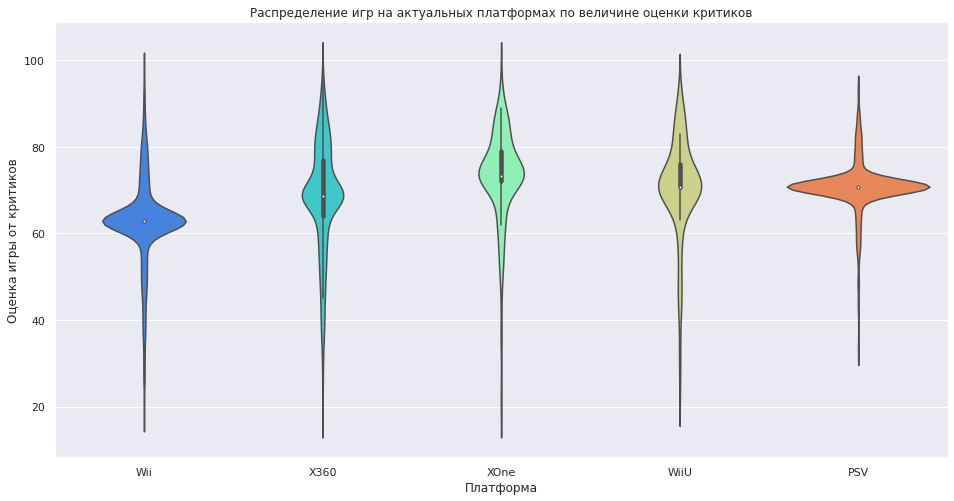

In [226]:
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.violinplot(x = 'platform', y = 'critic_score', data = dfw, palette = 'rainbow')
ax.set (xlabel='Платформа',
        ylabel='Оценка игры от критиков',
        title='Распределение игр на актуальных платформах по величине оценки критиков');

<div class="alert alert-info">
  Медианные оценки игр критиков на актуальных платформах лежат в интервале 60 - 80 баллов. Все платформы имеют выбросы в оценках
критиков, как к верхнему пределу (до 100 баллов), так и к нижнему интервалу оценок - от 10 до 30 баллов. Самые высокие медианные
оценки критиков (выше 70) у игр на платформах XOne и WiiU. Медианная оценка игр на остальных платформах ниже 70 баллов.
Максимальная медианная оценка от критиков у игр на платформе XOne, а минимальная - у игр на платформе Wii.
</div>

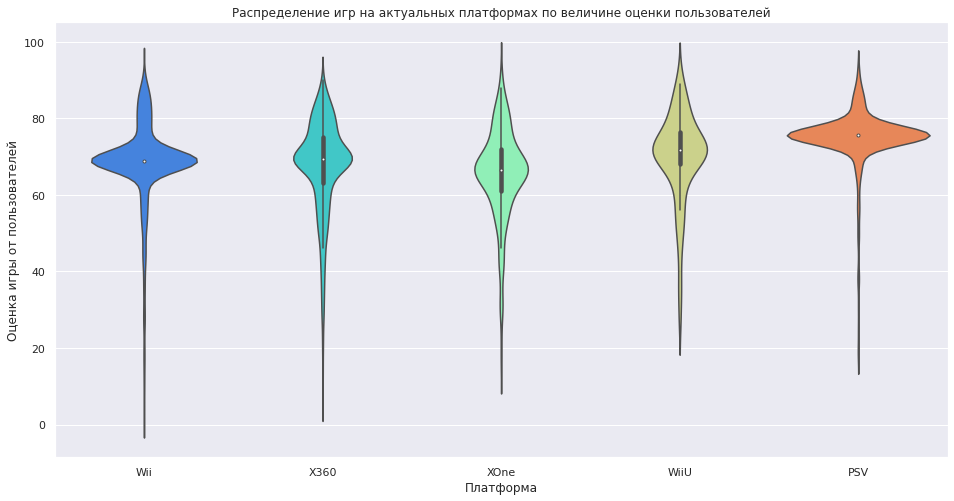

In [227]:
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.violinplot(x = 'platform', y = 'user_score', data = dfw, palette = 'rainbow')
ax.set (xlabel='Платформа',
        ylabel='Оценка игры от пользователей',
        title='Распределение игр на актуальных платформах по величине оценки пользователей');

<div class="alert alert-info">
  Медианные оценки игр пользователей на актуальных платформах также лежат в интервале 60 - 80 баллов. Все платформы имеют
выбросы в оценках пользователей, как к верхнему пределу (до 100 баллов), так и к нижнему уровню оценок в районе 0 баллов. Самые
высокие медианные оценки пользователей (выше 70) у игр на платформах PSV и WiiU, а самая низкая медианная оценка (ниже 70 баллов)
у игр на платформе XOne. Игры на остальных платформах имеют близкую медианную оценку в районе 70. Интересно, что платформа XOne,
занимающая по выручке в 2015 - 2016 гг 2 место имеет самую низкую медианную оценку пользователей. 
</div>

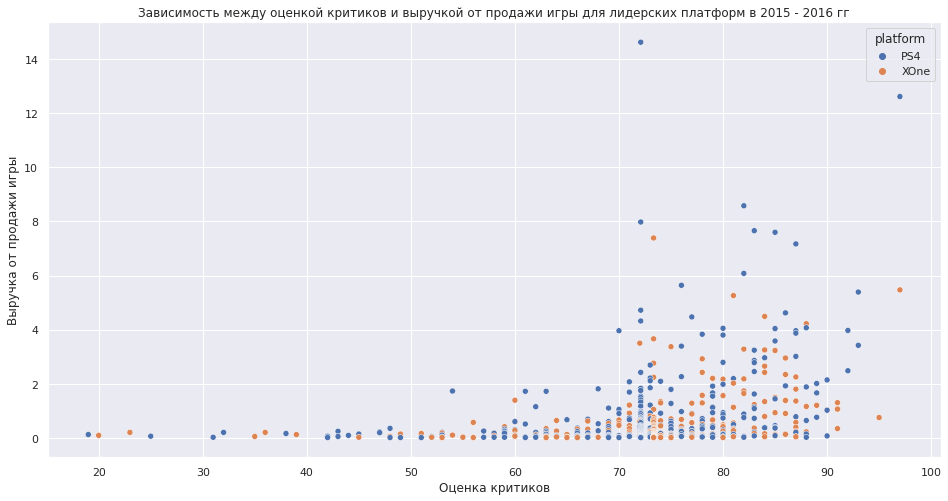

In [228]:
df_w = df.loc[(df['platform'] == "PS4") | (df['platform'] == "XOne")] 
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.scatterplot(data=df_w, y="sales_total", x="critic_score", hue = 'platform')
ax.set (xlabel='Оценка критиков',
        ylabel='Выручка от продажи игры',
        title='Зависимость между оценкой критиков и выручкой от продажи игры для лидерских платформ в 2015 - 2016 гг');

In [229]:
df_w.query('platform == "PS4"')['sales_total'].corr(df_w['critic_score']), df_w.query('platform == "XOne"')['sales_total'].corr(df_w['critic_score'])

(0.3317955102531406, 0.3440599190223727)

<div class="alert alert-info">
  Выручка от игр на лидирующих в 2015 - 2016 гг платформах (PS4 и XOne), в целом, увеличивается с повышением оценок критиков, 
коэф коррелиции для обоих платформ близки и составляют 0,33 и 0,34, соответственно.
</div>

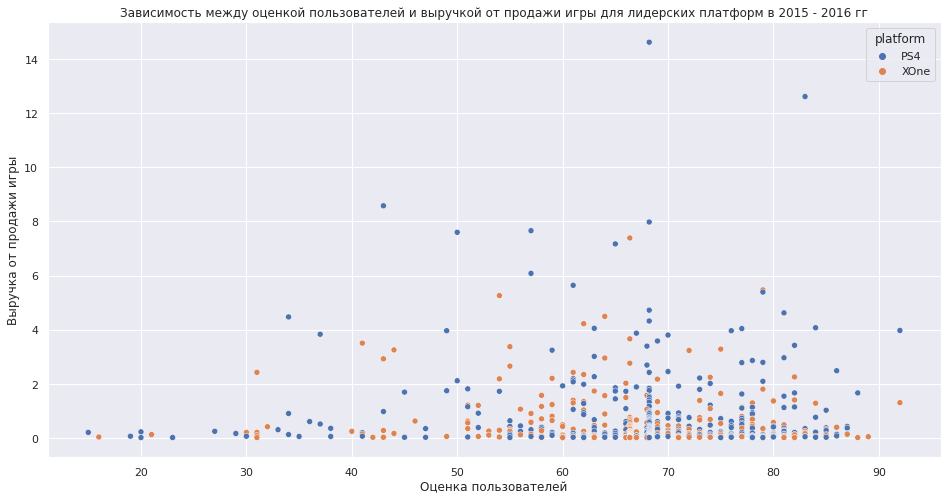

In [230]:
df_ww = df.loc[(df['platform'] == "PS4") | (df['platform'] == "XOne")] 
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.scatterplot(data=df_ww, y="sales_total", x="user_score", hue = 'platform')
ax.set (xlabel='Оценка пользователей',
        ylabel='Выручка от продажи игры',
        title='Зависимость между оценкой пользователей и выручкой от продажи игры для лидерских платформ в 2015 - 2016 гг');

In [231]:
df_ww.query('platform == "PS4"')['sales_total'].corr(df_ww['user_score']), df_ww.query('platform == "XOne"')['sales_total'].corr(df_ww['user_score'])

(-0.02998123728812855, -0.06451171528633708)

<div class="alert alert-info">
  Выручка от игр на лидирующих в 2015 - 2016 гг платформах (PS4 и XOne) не зависит от оценок пользователей, 
коэф коррелиции для обоих платформ близки к 0 и составляют -0,03 и -0,06, соответственно.
</div>

In [232]:
df['sales_total'].corr(df['critic_score']), df['sales_total'].corr(df['user_score'])

(0.22690145926109906, 0.07246902530283031)

<div class="alert alert-info">
  Cитуация с влиянием оценок критиков и пользователей на выручку от продажи игр на лидирующих в 2015 - 2016 гг платформах
аналогична для всех платформ - рост оценок критиков в небольшой степени способствует росту выручки (коэф корр = 0,23), а 
оценки пользователей практически не влияют на выручку (коэф корр = 0,072). 
</div>

<div class="alert alert-info">
  <b> Жанровая принадлежность игр на актуальных платформах </b>
    <a id="start7"></a> 
</div>

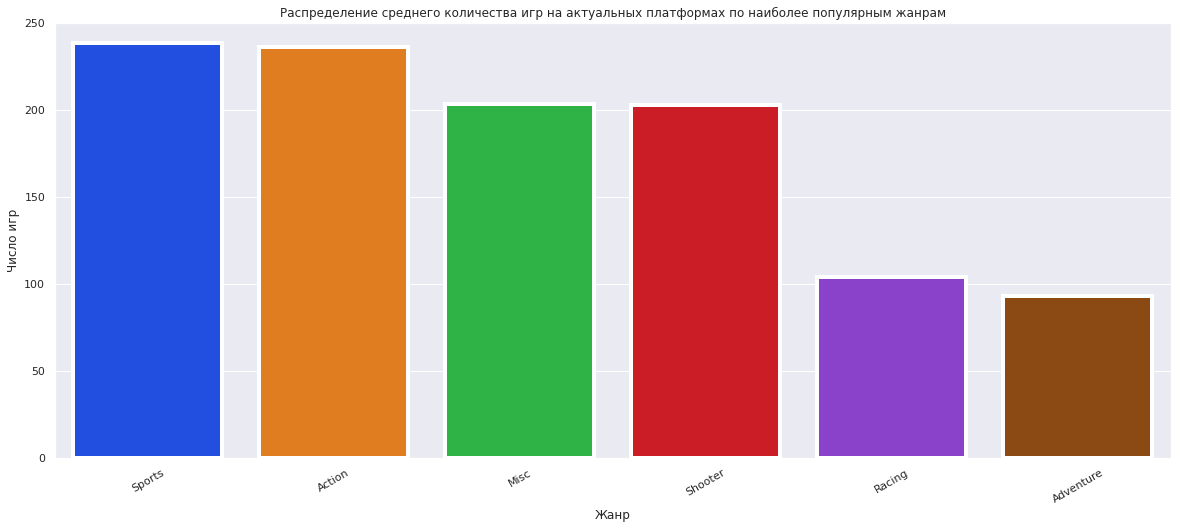

In [237]:
df_w = dfw.groupby(['genre', 'platform'], as_index = False).agg({'name':'count'}).sort_values(by = 'name', ascending = False)[:10]
df_ww = df_w.groupby('genre', as_index = False).agg({'name':'mean'}).sort_values(by = 'name', ascending = False)[:10]
ax = sns.barplot(x = 'genre', y = 'name', data = df_ww, linewidth = 4)
sns.set(rc={'figure.figsize':(20,8)})
sns.set_palette('bright')
ax.set (xlabel='Жанр', ylim = (0,250),
        ylabel='Число игр',
        title='Распределение среднего количества игр на актуальных платформах по наиболее популярным жанрам')
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
  Среди игр на актуальных платформах наиболее популярным жанром является Sports, который по среднему числу игр на платформе
немного опережает Action. В 5 наиболее популярных жанров также входят Misc, Shooter и Racing. 
</div>

<div class="alert alert-info">
  Исправлено: абсолютные количества игр были заменены на распределение среднего числа игр по платформам для каждого жанра.
</div>

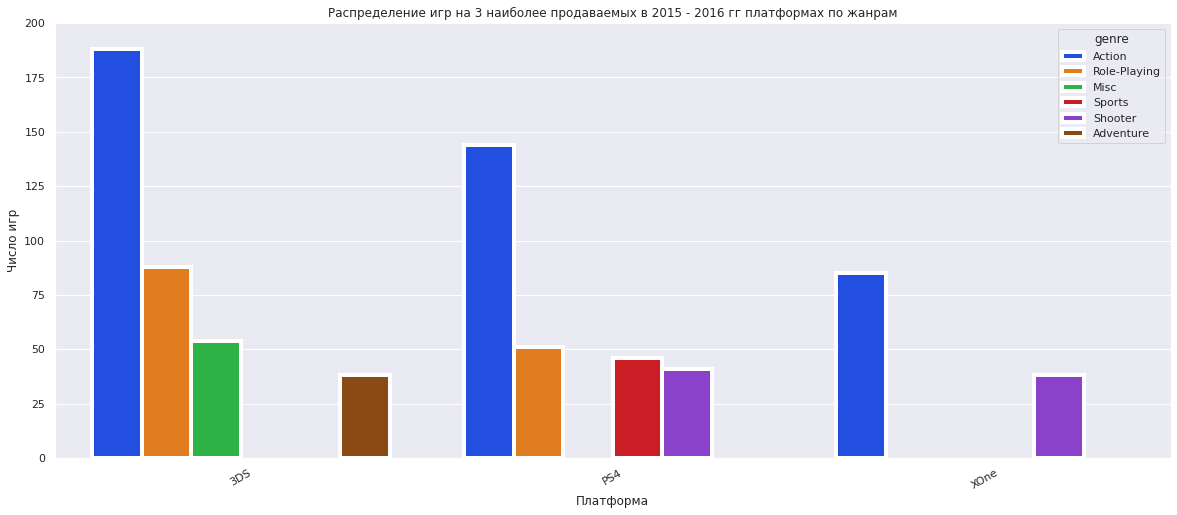

In [239]:
w = list(df.query('year_of_release >= 2015')['platform'])
dfw = df.loc[df['platform'].isin(w)]
r = ['PS4','XOne','3DS']
df_y = dfw.loc[dfw['platform'].isin(r)].groupby(['platform','genre'], as_index = False).agg({'name':'count'}).sort_values(by = 'name', ascending = False)[:10]
sns.set(rc={'figure.figsize':(20,8)})
sns.set_palette('bright')
ax = sns.barplot(x = 'platform', y = 'name', data = df_y, hue = 'genre', linewidth = 4)
ax.set (xlabel='Платформа', ylim = (0,200),
        ylabel='Число игр',
        title='Распределение игр на 3 наиболее продаваемых в 2015 - 2016 гг платформах по жанрам')
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
  Наиболее актуальные платформы в 2015 - 2016 гг PS4, XOne и 3DS также имеют наибольшее число игр в жанре Action. На платформах 
3DS и PS4 на втором месте по числу игр находится жанр Role-Playing (более, чем в 2 раза меньше игр, по сравнению с Action). 
3 место на платформе PS4 занимает жан Sports, а 4 - Shooter. На платформе XOne 2 место занимает Shooter, а на платформе 3DS 
3 и 4 места принадлежат жанрам Misc и Adventure.
</div>

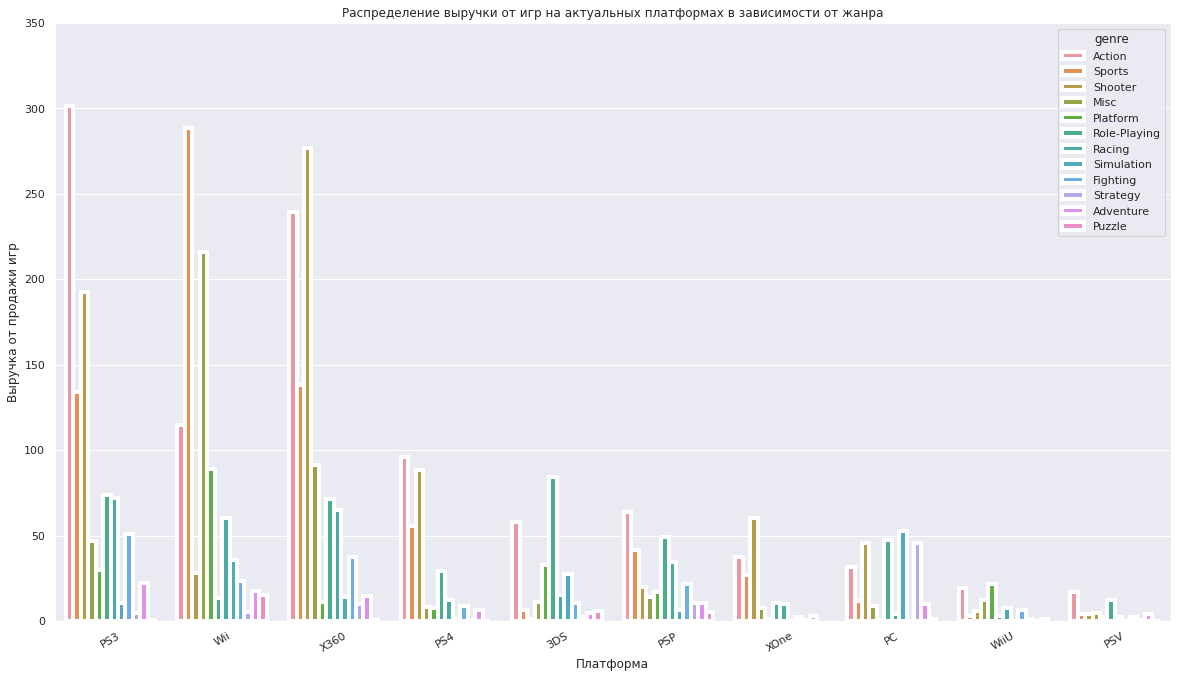

In [240]:
df_g = dfw.groupby(['platform','genre'], as_index = False).agg({'sales_total':'sum'}).sort_values(by = 'sales_total', ascending = False)
sns.set(rc={'figure.figsize':(20,11)})
sns.set_palette('bright')
ax = sns.barplot(x = 'platform', y = 'sales_total', hue = 'genre', data = df_g, linewidth = 4)
ax.set (xlabel='Платформа', ylim = (0,350),
        ylabel='Выручка от продажи игр',
        title='Распределение выручки от игр на актуальных платформах в зависимости от жанра')
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
  На актуальных платформах максимальную выручку приносят игры, относящиеся к 4 лидирующим жанрам - Action, Sports, Shooting 
и Misc и чем выше суммарная выручка от продажи игр на платфоре, тем сильнее доминирование этих жанров. Так на среди 4 платформ
с наибольшей выручкой на PS3 наиболее прибыльный жанр Action, а на 2 месте Shooter, на платформе Wii - наибольшую выручку
делает жанр Sports, на 2 месте Misc, на платформе X360 первое место по выручке занимает Shooter, а 2 - Action. На платформах
с более низкой выручкой лидирует либо жанр Action, либо Shooter, а на некоторых (3DS, WiiU) - Role-Plaing. Самые низкие продажи
имеют игры в жанрах Puzzle, Strategy, Adventure и Simulation.  
</div>

<div class="alert alert-info">
  <b> Анализ потребительских предпочтений в различных регионах </b>
    <a id="start8"></a> 
</div>

In [241]:
u = []
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    u.append(dfw.groupby('platform', as_index = False).agg({i:'sum'}).sort_values(by = i, ascending = False))
w = []
for i in range(len(u)):
    w.append(set(list(u[i]['platform'])))
w[0].difference(w[1]), w[0].difference(w[2])

(set(), set())

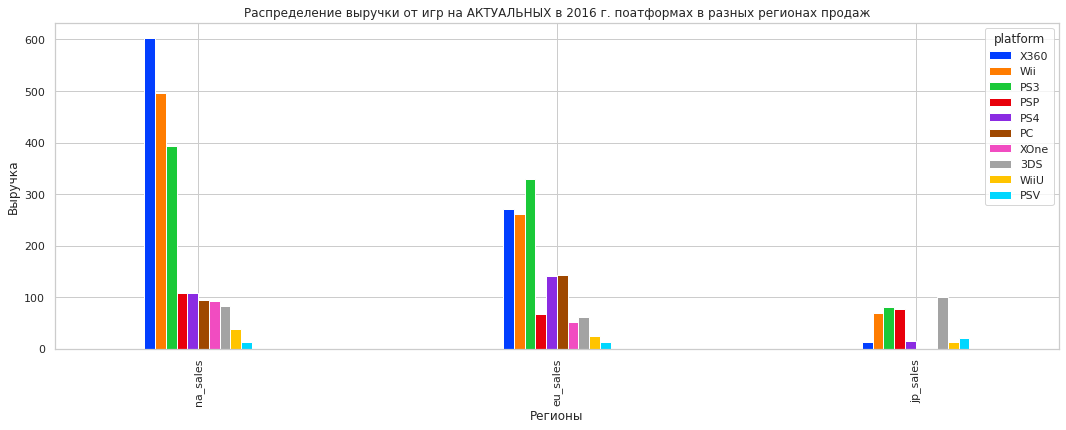

In [242]:
dfi = u[0]
del u[0]
for i in range(len(u)):
    dfi = dfi.merge(u[i], on = 'platform', how = 'outer')
sns.set_style('whitegrid')
sns.set_palette('bright')
dfi.set_index('platform').T.plot(kind='bar', width = 0.3, title = 'Распределение выручки от игр на АКТУАЛЬНЫХ в 2016 г. поатформах в разных регионах продаж',
                                             figsize=(18,6))
plt.xlabel("Регионы")
plt.ylabel("Выручка"); 

<div class="alert alert-info">
   В Северной Америке среди актуальных в 2016 г платформ (платформы на которых продолжают выходить релизы игр в 2016 г.) самая
большая выручка была от продажи игр на платформе X360, 2 и 3 места - Wii и PS3. В 5 лидеров также входят PS4 и PC. В Европе 
лидерство по выручке среди актуальных платформ распределяется немного по-другому (1 - 5 места): PS3, X360, Wii, PC и PS4. В
Японии лидирует платформа 3DS, за ней идут PS3 и Wii. В NA, EU и JP самые низкоприбыльные из актуальных платформ - PSV и WiiU.  
</div>

In [243]:
u = []
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    u.append(df.groupby('genre', as_index = False).agg({i:'sum'}).sort_values(by = i, ascending = False)[:12])
w = []
list(u[1]['genre'])
for i in range(len(u)):
    w.append(set(list(u[i]['genre'])))
w[0].difference(w[1]), w[0].difference(w[2])

(set(), set())

In [244]:
dfi = u[0]
del u[0]
for i in range(len(u)):
    dfi = dfi.merge(u[i], on = 'genre', how = 'outer')

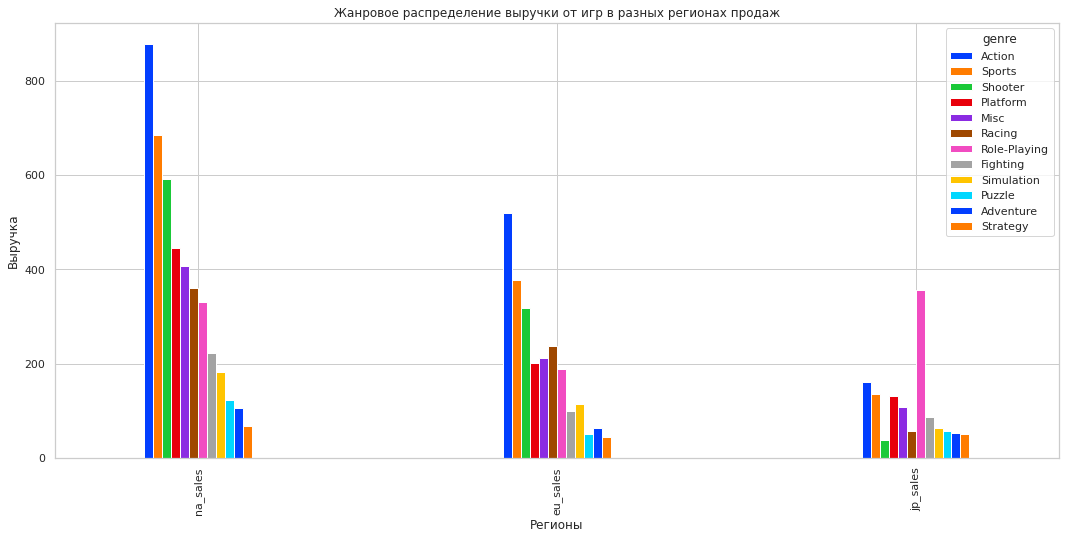

In [245]:
sns.set_style('whitegrid')
sns.set_palette('bright')
dfi.set_index('genre').T.plot(kind='bar', width = 0.3, title = 'Жанровое распределение выручки от игр в разных регионах продаж',
                                             figsize=(18,8))
plt.xlabel("Регионы")
plt.ylabel("Выручка"); 

<div class="alert alert-info">
  В Северной Америке и Европе лидерами продаж являются игры в жанре Action, второе место находятся игры Sports, а третье место
занимают игры жанра Shooter. В NA в первую пятерку входят также игры жанров Platform и Misc. В Европе 4 и 5 места принадлежат 
жанрам Racing и Misc, а Platform занимает 6 место. В Японии с двукратным отрывом лидирует жанр Role-Playing, а в 5 лидеров также 
входят, соответвенно, жанры Action, Sports, Platform и Misc. В NA, Eu и Jp хуже всего продаются игры жанров Strategy, Adventure и 
Puzzle.
</div>

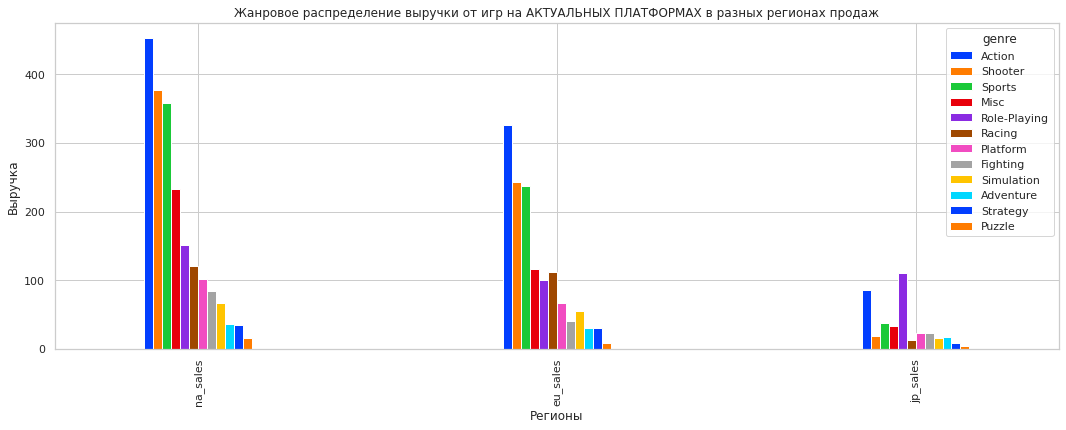

In [246]:
u = []
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    u.append(dfw.groupby('genre', as_index = False).agg({i:'sum'}).sort_values(by = i, ascending = False)[:12])
w = []
list(u[1]['genre'])
for i in range(len(u)):
    w.append(set(list(u[i]['genre'])))
w[0].difference(w[1]), w[0].difference(w[2])
dfi = u[0]
del u[0]
for i in range(len(u)):
    dfi = dfi.merge(u[i], on = 'genre', how = 'outer')
sns.set_style('whitegrid')
sns.set_palette('bright')
dfi.set_index('genre').T.plot(kind='bar', width = 0.3, title = 'Жанровое распределение выручки от игр на АКТУАЛЬНЫХ ПЛАТФОРМАХ в разных регионах продаж',
                                             figsize=(18,6))
plt.xlabel("Регионы")
plt.ylabel("Выручка"); 

<div class="alert alert-info">
  Тенденции продаж игр на актуальных в 2016 г. платформах в NA и Eu неизменны с точки зрения лидирующего жанра - Action.
Второе и третье места занимают, соответственно, Shooter и Sports. В NA в 6 наиболее продаваемых жанров входят также Misc,
Role-Playing и Racing. В Eu 3 - 6 места распределены по-другому: Misc, Racing и Role-Playing. В Японии, по0прежнему
лидирует Role-Playing, но с очень небольшим отрывом превосходит 2 по выручке жанр - Action, далее идут Sports, Misc и 
Shooter.
</div>

In [247]:
dfr = df.groupby('rating', as_index = False).agg({'name':'count'}).sort_values(by = 'name', ascending = False)[:10]
fig = px.bar(dfr, x = 'rating', y = 'name', height = 500)
fig.update_layout(xaxis_title = 'Рейтинг', yaxis_title = 'Число проданных игр', 
                  title = 'Распределение игр по рейтинговой принадлежности')
fig.update_traces(textfont_size=12, textangle=10, textposition="inside", cliponaxis=False)
fig.update_traces(textfont_size=12, textangle=10, textposition="inside", cliponaxis=False)
fig.show()

<div class="alert alert-info">
  В целом все игры распределены по 4 основным рейтингам: больше всего игр (около 5500) имеют рейтинг E, далее идет рейтинг Т 
(около 3500), более 1500 игр имеют рейтинг М, а немного менее 1500 игр имеют рейтинг E10+.  
</div>

In [248]:
dfr = dfw.groupby('rating', as_index = False).agg({'name':'count'}).sort_values(by = 'name', ascending = False)[:10]
fig = px.bar(dfr, x = 'rating', y = 'name', height = 500)
fig.update_layout(xaxis_title = 'Рейтинг', yaxis_title = 'Число проданных игр', 
                  title = 'Распределение игр на АКТУАЛЬНЫХ ПЛАТФОРМАХ по рейтинговой принадлежности')
fig.update_traces(textfont_size=12, textangle=10, textposition="inside", cliponaxis=False)
fig.update_traces(textfont_size=12, textangle=10, textposition="inside", cliponaxis=False)
fig.show()

<div class="alert alert-info">
  Распределение игр по рейтингам для актуальных в 2016 г платформ повторяет глобальное распределение игр за имеющуюся 
историю продаж.
</div>

In [251]:
u = []
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    u.append(df.groupby('rating', as_index = False).agg({i:'sum'}).sort_values(by = i, ascending = False)[:4])
w = []
for i in range(len(u)):
    w.append(set(list(u[i]['rating'])))
w[0].difference(w[1]), w[0].difference(w[2])

(set(), set())

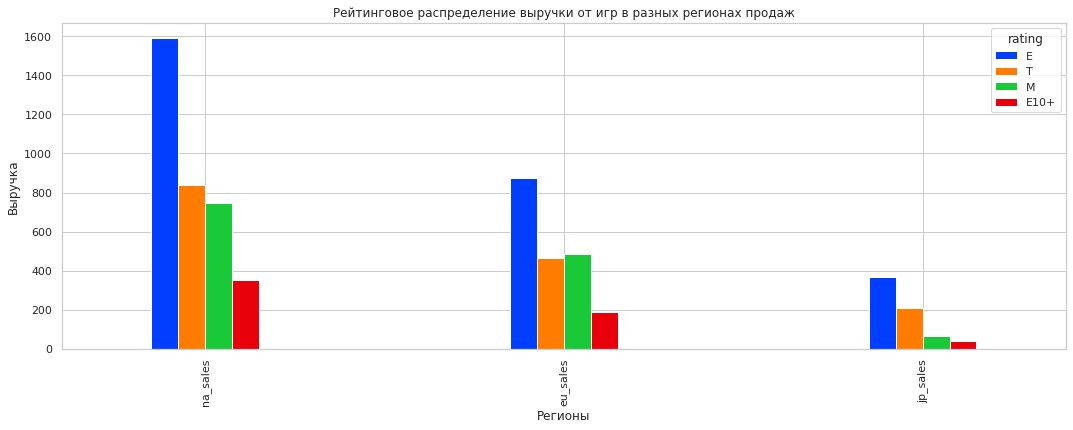

In [250]:
dfi = u[0]
del u[0]
for i in range(len(u)):
    dfi = dfi.merge(u[i], on = 'rating', how = 'outer')
sns.set_style('whitegrid')
sns.set_palette('bright')
dfi.set_index('rating').T.plot(kind='bar', width = 0.3, title = 'Рейтинговое распределение выручки от игр в разных регионах продаж',
                                             figsize=(18,6))
plt.xlabel("Регионы")
plt.ylabel("Выручка"); 

<div class="alert alert-info">
  Распределение выручки от игр с разным рейтингом для всех регионов аналогично: больше всего собирают игры с рейтингном E,
затем идут игры рейтинга T, далее - М и Е10+. Только в Eu выручка от игр рейтинга M чуть опережает рейтинг T.  
</div>

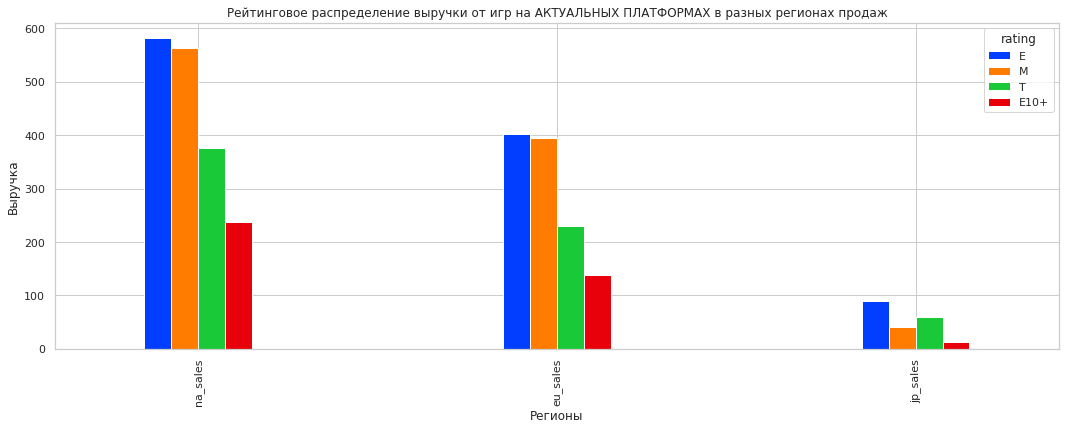

In [2301]:
u = []
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    u.append(dfw.groupby('rating', as_index = False).agg({i:'sum'}).sort_values(by = i, ascending = False)[:4])
w = []
for i in range(len(u)):
    w.append(set(list(u[i]['rating'])))
dfi = u[0]
del u[0]
for i in range(len(u)):
    dfi = dfi.merge(u[i], on = 'rating', how = 'outer')
sns.set_style('whitegrid')
sns.set_palette('bright')
dfi.set_index('rating').T.plot(kind='bar', width = 0.3, title = 'Рейтинговое распределение выручки от игр на АКТУАЛЬНЫХ ПЛАТФОРМАХ в разных регионах продаж',
                                             figsize=(18,6))
plt.xlabel("Регионы")
plt.ylabel("Выручка"); 

<div class="alert alert-info">
  На платформах, выпускающих релизы в 2016 г., распределение выручки по рейтингам игр отличается от исторического. Больше всего
выручки во всех регионах по-прежнему приносят игры с рейтингом E, но в NA и Eu от них совсем немного отстают игры с рейтингом
M, а в Jp 2 место занимает рейтинг Т. Рейтинг E10+ занимает последнее место по выручке во всех регионах. 
</div>

<div class="alert alert-info">
  <b> Сравнение пользовательских рейтингов игр на платформах XOne и PC  </b>
    <a id="start9"></a> 
</div>

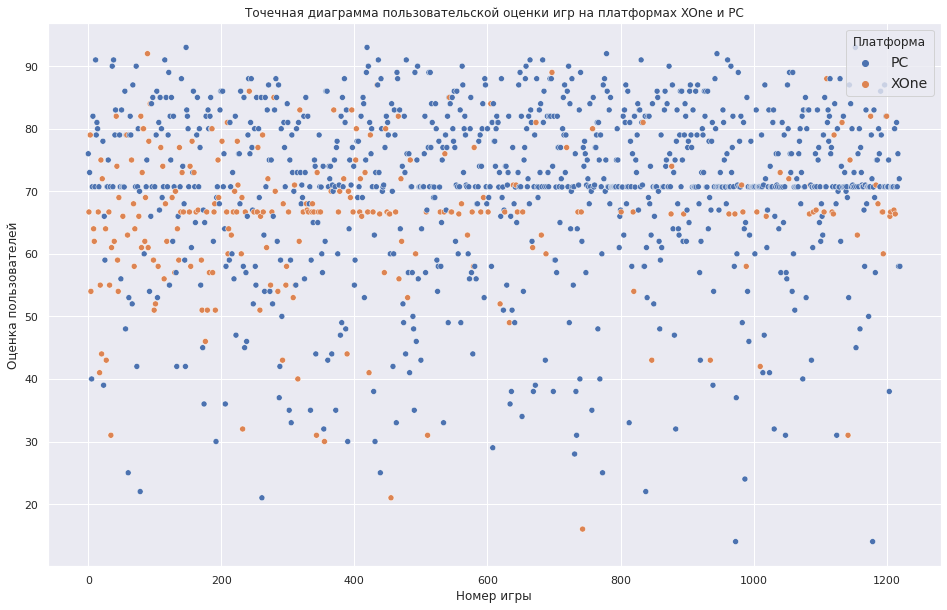

In [124]:
orders = df.query('platform == "XOne" | platform == "PC"')
orders['number'] = range(len(orders))
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,10)})
ax = sns.scatterplot(data=orders, x = 'number', y="user_score", hue = 'platform')
plt.legend(loc = 'upper right', title = 'Платформа', fontsize = 14)
ax.set (xlabel='Номер игры',
        ylabel='Оценка пользователей',
        title='Точечная диаграмма пользовательской оценки игр на платформах XOne и PC')
pd.options.mode.chained_assignment = None;

<div class="alert alert-info">
  Точечная диаграмма распределения пользовательских оценок игр на платформах XOne и PC показывает локализацию оценок в интервале
50 - 90. При этом центром локализации оценок игр на платформе PC расположен около 70 баллов, а для игр XOne - га уровне 66 баллов.
</div>

In [125]:
np.percentile(orders.query('platform == "XOne"')['user_score'], [95, 97.5, 99])

array([81.99999809, 84.84999943, 87.54000015])

In [126]:
np.percentile(orders.query('platform == "PC"')['user_score'], [95, 97.5, 99])

array([88.00000191, 88.99999619, 91.00000381])

In [127]:
np.percentile(orders.query('platform == "XOne"')['user_score'], [1, 2.5, 5])

array([30.45999956, 31.14999926, 43.00000191])

In [128]:
np.percentile(orders.query('platform == "PC"')['user_score'], [1, 2.5, 5])

array([28.73000057, 34.32500064, 40.99999905])

<div class="alert alert-info">
  Для очистки данных для обоих платформ были рассчитаны верхние и нижние перцентили, которые показывают, что
пользовательская оценка игр PC размыта в более широких пределах, по сравнению с играми XOne. Для удаления выбросов из данных
целесообразно убрать точки, лежащие ниже перцентиля 5% и выше перцентиля 95%.
</div>

In [129]:
orders_c = orders.loc[(orders['platform'] == 'XOne') & (orders['user_score'] > 82)]
orders_s = orders.loc[(orders['platform'] == 'XOne') & (orders['user_score'] < 30)]
len(orders_c)+len(orders_s)

14

In [130]:
orders_c1 = orders.loc[(orders['platform'] == 'PC') & (orders['user_score'] > 88)]
orders_s1 = orders.loc[(orders['platform'] == 'PC') & (orders['user_score'] < 28)]
len(orders_c1)+len(orders_s1)

62

In [131]:
orders_n = orders.query('platform == "XOne"').loc[(~orders['user_score'].isin(orders_c['user_score'])) & (~orders['user_score'].isin(orders_s['user_score']))]   
len(orders_n)

233

In [132]:
orders_m = orders.query('platform == "PC"').loc[(~orders['user_score'].isin(orders_c1['user_score'])) & (~orders['user_score'].isin(orders_s1['user_score']))]   
len(orders_m)

912

<div class="alert alert-info">
  Из рассмотрения искючаются выбросы: 14 точек для платформы XOne и 43 точки для платформы PC.  
</div>

In [133]:
st.ttest_ind(orders_n['user_score'], orders_m['user_score'], equal_var=False, alternative='two-sided').pvalue

2.5494044992438674e-10

In [134]:
st.ttest_ind(orders_n['user_score'], orders_m['user_score'], equal_var=False, alternative='less').pvalue

1.2747022496219337e-10

In [135]:
st.ttest_ind(orders_n['user_score'], orders_m['user_score'], equal_var=False, alternative='greater').pvalue

0.9999999998725297

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей пользовательских оценок игр на платформе XOne (A) и
                            игр на платформе PC (B) равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Сравнение методом st.ttest_ind() последовательностей очищенных пользовательских оценок показывает, что, при уровне
статистической значимости 1% нулевая гипотеза может быть отброшена в пользу альтернативных 'two-sided' и 'less'. Таким образом,
можно утверждать, что средняя пользовательская оценка XOne ниже средней оценки PC.                                                     
</div>

In [136]:
st.mannwhitneyu(orders_n['user_score'],orders_m['user_score'],True,'two-sided').pvalue

2.212000762302027e-17

In [137]:
st.mannwhitneyu(orders_n['user_score'],orders_m['user_score'],True,'less').pvalue

1.1060003811510135e-17

In [138]:
st.mannwhitneyu(orders_n['user_score'],orders_m['user_score'],True,'greater').pvalue

1.0

<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В пользовательских оценок равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей значений 
пользовательских оценок показывает, что совокупность оценок XOne меньше совокупности оценок PC.
</div>

<div class="alert alert-info">
  <b> Сравнение пользовательских рейтингов игр жанров Action и Sports  </b>
    <a id="start10"></a> 
</div>

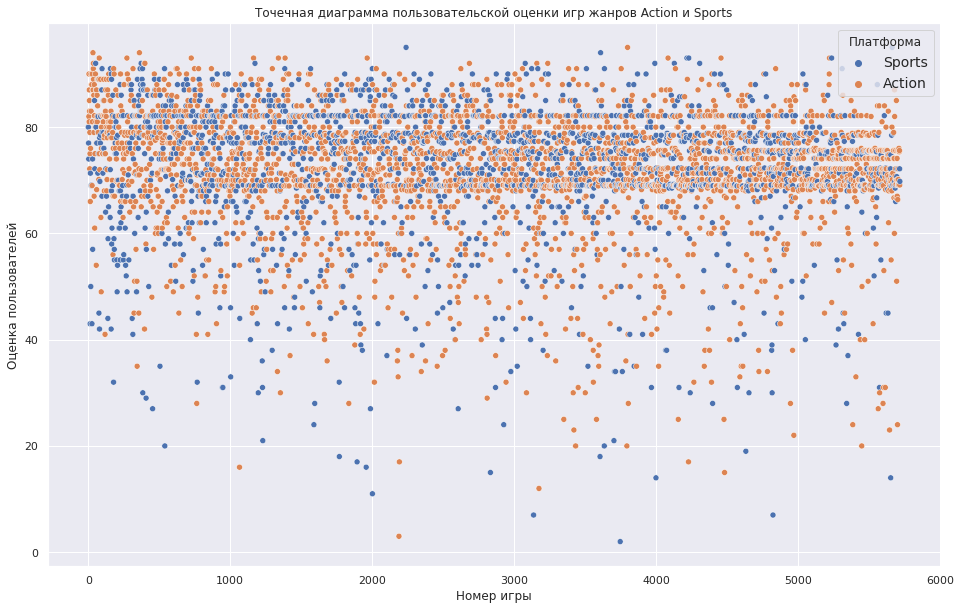

In [139]:
orders = df.query('genre == "Action" | genre == "Sports"')
orders['number'] = range(len(orders))
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,10)})
ax = sns.scatterplot(data=orders, x = 'number', y="user_score", hue = 'genre')
plt.legend(loc = 'upper right', title = 'Платформа', fontsize = 14)
ax.set (xlabel='Номер игры',
        ylabel='Оценка пользователей',
        title='Точечная диаграмма пользовательской оценки игр жанров Action и Sports')
pd.options.mode.chained_assignment = None;

<div class="alert alert-info">
  Точечная диаграмма распределения пользовательских оценок игр жанров Action и Sports показывает локализацию оценок в интервале
20 - 95. При этом центром локализации оценок игр Action расположен около 70 баллов, а для игр Sports - на уровне 80 баллов.
</div>

In [140]:
orders_n = orders.query('user_score < 90 and user_score > 20 and genre == "Action"')
len(orders_n)

3163

In [141]:
orders_m = orders.query('user_score < 90 and user_score > 20 and genre == "Sports"')
len(orders_m)

2104

In [142]:
st.ttest_ind(orders_n['user_score'], orders_m['user_score'], equal_var=False, alternative='two-sided').pvalue

0.028372867186993826

In [143]:
st.ttest_ind(orders_n['user_score'], orders_m['user_score'], equal_var=False, alternative='less').pvalue

0.014186433593496913

In [144]:
st.ttest_ind(orders_n['user_score'], orders_m['user_score'], equal_var=False, alternative='greater').pvalue

0.9858135664065031

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей пользовательских оценок игр Action (A) и
                            игр Sports (B) равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Сравнение методом st.ttest_ind() последовательностей очищенных пользовательских оценок показывает, что, при уровне
статистической значимости 5% нулевая гипотеза может быть отброшена в пользу альтернативной гипотезы 'less'. Таким образом,
можно утверждать, что средняя пользовательская оценка жанра Action ниже средней оценки жанра Sports.                                                     
</div>

In [145]:
st.mannwhitneyu(orders_n['user_score'],orders_m['user_score'],True,'two-sided').pvalue

2.438453550614524e-05

In [146]:
st.mannwhitneyu(orders_n['user_score'],orders_m['user_score'],True,'less').pvalue

1.219226775307262e-05

In [147]:
st.mannwhitneyu(orders_n['user_score'],orders_m['user_score'],True,'greater').pvalue

0.9999878087331519

In [ ]:
<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В пользовательских оценок равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей значений 
пользовательских оценок показывает, что совокупность оценок Action меньше совокупности оценок Sports.
</div>

<div class="alert alert-info">
  <b> Выводы  </b>
    <a id="start11"></a> 

<div class="alert alert-info">
    
   <b> Предобработка данных </b>
      
   Таблица с данными содержит 11 столцов и 16715 рядов. В ряде столбцов есть пропуски: 'Name' - 2 пропуска, 'Year_of_Release' -
269 пропусков, 'Genre' - 2 пропуска, 'Critic_Score' - 8578 пропусков, 'User_Score ' - 6701 пропуск и 'Rating' - 6766 пропусков.
Cтолбец 'User_Score' имеет неверный тип данных.
     В столбце 'user_score' есть 2424 записи 'tbd' (ожидают оценки). Вместе с тем, коэффициенто корреляции оценок критиков и 
пользователей находится на довольно высоком уровне и составляет 0,58. Это позволяет примерно оценить неизвестное значение
столбца 'user_score', если известно значение столбца 'critic_score' (и наоборот). Для каждой записи было найдено соотношение
между соответствующими значениями столбцов 'user_score' и 'critic_score' (столбец 'ratio'). Значения столбца 'ratio' имеют 
небольшой разброс - среднее составляет 1,04, а медиана - 1,03, что свидетельствует о близости оценок критиков и пользователей.
Для каждой платформы были найдены средние значения столбца 'ratio' (столбец 'mean_rat'), а значения собца 'user_score' были 
приведены к типу 'float' и умножены на 10, чтобы соответствовать процентной оценки в столбце 'critic_score'. Также для каждой
платформы были найдены средние значения столбца 'critic_score' (солбец 'crit'). Затем значения в столбце 'user_score', 
соответствующие записям 'tbd', были заменены на произведения значений стобцов 'mean_rat' и 'crit'.
     Сравнение средних и медианных баллов критиков и пользователей с разбивкой по платформам показывает, что в пределах одной 
платформы среднее и медианное значения баллов очень близки. Это означает, что в пределах одной платформы все значения в 
столбцах 'critic_score' и 'user_score' очень близки и имеют мало выбросов, что дает возможность заполнить пропуски данных 
средними значениями по каждой платформе.
     Так как в пределах платформы значения в столбцах 'critic_score' и 'user_score' имеют небольшой разброс и близки к среднему, то
пропуски данных были заполнены соответствующими средними значениями для каждой платформы. Вместе с тем, остается 14 платформ,
для которых не известны оценочные данные критиков и пользователей, что обуславливает остаточное количество пропусков (1120) 
в столбцах 'critic_score' и 'user_score', которые соответствуют этим 14 неоцененным платформам.  Только 17 платформ имеют оценки в столбце 'rating'. Остальные 14 платформ с неизвестными оценками в столбцах 'critic_score' 
и 'user_score' не имеют также рейтинговых данных в столбце 'rating'. На 17 платформах, для которых в таблице присутствуют рейтинговые оценки, распределение рейтинга носит неравномерный характер,
преобладают оценки Е, Т, Е10+ и М. 
      В каждом жанре присутствуют игры с различным рейтингом. В некоторых жанрах определенный рейтинг доминирует, оо есть, более 
80% игр обладают доминирующим рейтингом: в жанрах Sports, Racing и Puzzle доминирует рейтинг E, а в жанре Fighting доминирует
рейтинг Т. Соответственно, появляется возможность заполнить пропуски в столбце 'rating' для игр с доминирующим жанром, так 
как вероятная ошибка будет относительно невелика. 
     В результате заполнения столбца 'rating' для игр, относящихся к жанрам с доминирующим рейтингом, удалось снизить число
пропусков в данном столбце с 6766 до 4901. Однако, оставшиеся пропуски не удается заполнить, так как данные игры не относятся 
к жанрам, имеющим доминирующий рейтинг, и вероятная ошибка при присвоении им определенного рейтинга будет недопустимо большой.
     Таким образом, часть пропусков в столбцах 'critic_score' и 'user_score', а также заменить записи 'tbd' в столбце 
'user_score' реальными значениями, исходя из наличия взаимной корреляции между имеющимися данными в столбцах 'critic_score' и 
'user_score', а также отсутствия большого разброса значений оценок критиков и пользователей в рамках различных платформ.
Оставшиеся пропуски в столбцах 'critic_score' и 'user_score' приурочены к платформам, которые не имеют оценок ни критиков,
ни пользователей. Часть пропусков в столбце 'rating' удается заполнить, исходя из преобладающего рейтинга в жанре, к которому
эти игры относятся. Остаются незаполненными также пропуски в столбце 'year_of_release' с неизвестными годами выхода игр. 

    
   <b> АНАЛИХ ДАННЫХ </b>
  
   Количество выпускаемых игр начало активно расти с 1990 года, начиная с которого число игр постепенно увеличивалось, достигнув
максимума (1400 игр/год) в 2007 и 2008 годах. В период 2009 - 2012 гг ежегодно выпускаемое число новых игр сократилось почти в 2
раза (около 600) и оставалось примерно на одном уровне (550 - 600) вплоть до 2016 г. Каждая платформа проходит цикл роста,
пика и спада полулярности, что выражается в экстремальном характере зависимости суммарного количества новых игр от года релиза. 
'Время жизни' каждой платформы составляет 5 - 15 лет, есть популярные платформы, на пике популярности которых выходило от 100 до
500 игр и непопулярные платформы, пиковое количество игр на которых не превышало 100 релизов. Для детального анализа графика 
необходимо выделить наиболее популярные платформы с общим количеством новых игр более 800.
    Выделение 10 платформ с наибольшим количеством релизов позволяет более отчетливо получить представление о периодах 
активности платформ, каждая из которых имеет свой жизненный цикл, состоящий из увеличения числа релизом, достижения максимума и
дальнейшего снижжения числа ежегодно выходящих новых игр до нуля. Все платформы-лидеры к 2016 г имеют угосающую популярность.
Новые игры после 2015 г продолжают выходить только на платформах PS3, PC и X360. Так как наиболее платформы с наиболее 
продаваемыми играми находятся к 2016 г в упадке, то нельзя исключать из анализа остальные платформы, которые не имеют к 2016 г
большого количества релизов, но могут находиться в стадии роста популярности.
   Для платформ установлена прямопропорциональная корреляция между числом выпущенных игр и общей выручкой (коэф корреляции 
равен 0,9). Таким образом, не смотря на разную стоимость игр, увеличение числа релизов обеспечивает  также увеличение объемов
ваыручки от продажи игр.
   Среди актуальных платформ, имеющих релизы в 2016 г., наибольшее число новых игр вышло на PS3, Wii и X360. Меньше всего игр 
вышло на платформе WiiU. 
   В 2016 году более 30 % игр вышло на платформе PS4, а 2 месте были платформы XOne и PSV (по 17 %), далее PC (11 %). Остальные
платформы выпустили менее 25 % релизов.
   Для оценки 'жизненного цикла' платформ (период, когда появляются новые релизы) были отфильтрованы платформы, еще имеющие 
релизы в 2015 г, так как у платформ с новыми релизами в 2015 г период жизни еще скорее всего не закончен (данные за 2016 г
неполные). Жизненный цикл платформ, не имеющих релизов в 2015 г, изменяется в широких пределах от 1 до 12 лет. Медианный
жизненный цикл платформы составляет 7 лет.

   <b> Определение актуального периода для прогноза продаж игр в 2017 году </b>
    
   Если предположить, что основные продажи игр с данной платформы происходят в основном в период ее жизненного цикла (период 
времени, когда на этой платформе выходят релизы игр), то для прогноза продаж на 2017 год имеют значения, только те платформы,
жизненный цикл которых еще продалжается в 2016 г. Так как данные за 2016 г неполные, то для прогноза подойдут платформы,
жизненный цикл которых не был закончен в 2015 г. Таких платформ всего 10, и их максимальный предыдущий период жизни составляет
12 лет, медианный жизненный цикл - 8,5 лет. Таким образом, для прогноза продаж в 2017 г имеет значение период с 2004 по 2016 гг.
(12 лет). 
     
   <b> Анализ релизов и выручки от актуальных платформ < </b>
    
   Среди актуальных платформ, имеющих релизы в 2016 г., наибольшая выручка приходится на X360, PS3 и Wii (25, 24 и 23 %).
Доля остальных платформ в выручке составила чуть более 25 %.
    Для игр, выпущенных в 2016 г., наибольшая выручка (более 50 %) приходится на платформу PS4, далее идут XOne и 3DS (20 и 12 %).
Остальные платформы по величине выручки занимают менее 20 %. 
    Распределение количества релизов игр на актуальных после 2015 года платформах показывает, что из 10 платформ 6 находятся 
в понижающей фазе жизненного цикла (PSP, Wii, WiiU, 3DS, PS3, X360), платформа PSV находится на пике, а платформа PC, не смотря
на общий спад релизов, начиная с 2013 года, вышла на плато по числу релизов. Платформы PS4 и XOne находятся в фазе роста 
числа релизов.
     Если полагать, что наибольшая выручка от игры концентрируется в год ее релиза, то распределение общей выручки от продажи игр
на актуальных платформах по времени релиза, в общем, коррелирует с количеством релизов, но также есть некоторые различия:
выручка от платформ PS4 и XOne, находящихся в нарастающей фазе по числу релизов, достигает максимума в 2015 г, а уже в 2016 г 
заметно понижается. Остальные 8 платформ (PSP, Wii, WiiU, 3DS, PS3, X360, PC и PSV), не смотря на пиковое число релизов на 
платформе PSV в 2015 г и плато, на которое вышли релизы на платформе PC, тем не мепнее к 2015 году находятся на стадии снижения
выручки.
     Полагая, что практически вся выручка от продажти игры собирается в год ее релиза, можно констатировать падение выручки от 
продажи игр на всех актуальных платформах. В 2016 г новые игры на платформе PSP не выходили и, соответственно, ее можно 
исключить из числа актуальных для прогноза выручки в 2017 г.

   
   <b> Распределение выручки от продажи игр на актуальных платформах </b>
   
   Медианная выручка от продажи игр для всех актуальных платформ не првыешает 0,5. Вместе с тем, все платформы имеют большое 
количество игр, выручка от продаши которых в десятки раз больше медианной. Самая снизкая медианная выручка от продажи игр на 
платформах PC и PSV, а самая высокая медианная выручка - от игр на платформах X360, PS3, PS4 и XOne. Из этих платформ PX4 и XOne
являются лидерами по общей выручке в 2015 и 2016 гг, а также находятся в фазе роста числа релизов в 2016 г. 
     Медианные оценки игр критиков на актуальных платформах лежат в интервале 60 - 80 баллов. Все платформы имеют выбросы в оценках
критиков, как к верхнему пределу (до 100 баллов), так и к нижнему интервалу оценок - от 10 до 30 баллов. Самые высокие медианные
оценки критиков (выше 70) у игр на платформах PS3, PS4, PC, XOne и WiiU. Медианная оценка игр на платформах Wii, 3DS, X360 и PSV
ниже 70 баллов. Лидеры по выручке в 2015 - 2016 гг PS4 и XOne имеют медианные оценки критиков выше среднего. Максимальная 
медианная оценка от критиков у игр на платформе PC (около 80), а минимальная - у игр на платформе Wii (около 60 баллов).
     Медианные оценки игр пользователей на актуальных платформах также лежат в интервале 60 - 80 баллов. Все платформы имеют
выбросы в оценках пользователей, как к верхнему пределу (до 100 баллов), так и к нижнему уровню оценок в районе 0 баллов. Самые
высокие медианные оценки пользователей (выше 70) у игр на платформах PSV и WiiU, а самая низкая медианная оценка (ниже 70 баллов)
у игр на платформе XOne. Игры на остальных платформах имеют близкую медианную оценку в районе 70. Интересно, что платформа XOne,
занимающая по выручке в 2015 - 2016 гг 2 место имеет самую низкую медианную оценку пользователей. 
     Выручка от игр на лидирующих в 2015 - 2016 гг платформах (PS4 и XOne), в целом, увеличивается с повышением оценок критиков, 
коэф коррелиции для обоих платформ близки и составляют 0,33 и 0,34, соответственно.
     Выручка от игр на лидирующих в 2015 - 2016 гг платформах (PS4 и XOne) не зависит от оценок пользователей, 
коэф коррелиции для обоих платформ близки к 0 и составляют -0,03 и -0,06, соответственно.
     Cитуация с влиянием оценок критиков и пользователей на выручку от продажи игр на лидирующих в 2015 - 2016 гг платформах
аналогична для всех платформ - рост оценок критиков в небольшой степени способствует росту выручки (коэф корр = 0,23), а 
оценки пользователей практически не влияют на выручку (коэф корр = 0,072). 

   
   <b> Распределение выручки от продажи игр на актуальных платформах </b>
    
   Среди игр на актуальных платформах наиболее популярным жанром является Action, который по числу игр в 2 раза превышает 
второй по популярности жанр - Sports. В 5 наиболее популярных жанров также входят Misc, Shooter и Role-Playing. Наиболее актуальные платформы в 2015 - 2016 гг PS4, XOne и 3DS также имеют наибольшее число игр в жанре Action. На платформах 
3DS и PS4 на втором месте по числу игр находится жанр Role-Playing (более, чем в 2 раза меньше игр, по сравнению с Action). 
3 место на платформе PS4 занимает жан Sports, а 4 - Shooter. На платформе XOne 2 место занимает Shooter, а на платформе 3DS 
3 и 4 места принадлежат жанрам Misc и Adventure.
    На актуальных платформах максимальную выручку приносят игры, относящиеся к 4 лидирующим жанрам - Action, Sports, Shooting 
и Misc и чем выше суммарная выручка от продажи игр на платфоре, тем сильнее доминирование этих жанров. Так на среди 4 платформ
с наибольшей выручкой на PS3 наиболее прибыльный жанр Action, а на 2 месте Shooter, на платформе Wii - наибольшую выручку
делает жанр Sports, на 2 месте Misc, на платформе X360 первое место по выручке занимает Shooter, а 2 - Action. На платформах
с более низкой выручкой лидирует либо жанр Action, либо Shooter, а на некоторых (3DS, WiiU) - Role-Plaing. Самые низкие продажи
имеют игры в жанрах Puzzle, Strategy, Adventure и Simulation.  

  
   <b> Анализ потребительских предпочтений в различных регионах </b>
    
   В Северной Америке среди актуальных в 2016 г платформ (платформы на которых продолжают выходить релизы игр в 2016 г.) самая
большая выручка была от продажи игр на платформе X360, 2 и 3 места - Wii и PS3. В 5 лидеров также входят PS4 и PC. В Европе 
лидерство по выручке среди актуальных платформ распределяется немного по-другому (1 - 5 места): PS3, X360, Wii, PC и PS4. В
Японии лидирует платформа 3DS, за ней идут PS3 и Wii. В NA, EU и JP самые низкоприбыльные из актуальных платформ - PSV и WiiU. 
     В Северной Америке и Европе лидерами продаж являются игры в жанре Action, второе место находятся игры Sports, а третье место
занимают игры жанра Shooter. В NA в первую пятерку входят также игры жанров Platform и Misc. В Европе 4 и 5 места принадлежат 
жанрам Racing и Misc, а Platform занимает 6 место. В Японии с двукратным отрывом лидирует жанр Role-Playing, а в 5 лидеров также 
входят, соответвенно, жанры Action, Sports, Platform и Misc. В NA, Eu и Jp хуже всего продаются игры жанров Strategy, Adventure и 
Puzzle.
     Тенденции продаж игр на актуальных в 2016 г. платформах в NA и Eu неизменны с точки зрения лидирующего жанра - Action.
Второе и третье места занимают, соответственно, Shooter и Sports. В NA в 6 наиболее продаваемых жанров входят также Misc,
Role-Playing и Racing. В Eu 3 - 6 места распределены по-другому: Misc, Racing и Role-Playing. В Японии, по0прежнему
лидирует Role-Playing, но с очень небольшим отрывом превосходит 2 по выручке жанр - Action, далее идут Sports, Misc и 
Shooter.
     В целом все игры распределены по 4 основным рейтингам: больше всего игр (около 5500) имеют рейтинг E, далее идет рейтинг Т 
(около 3500), более 1500 игр имеют рейтинг М, а немного менее 1500 игр имеют рейтинг E10+. Распределение игр по рейтингам для актуальных в 2016 г платформ повторяет глобальное распределение игр за имеющуюся 
историю продаж. 
     Распределение выручки от игр с разным рейтингом для всех регионов аналогично: больше всего собирают игры с рейтингном E,
затем идут игры рейтинга T, далее - М и Е10+. Только в Eu выручка от игр рейтинга M чуть опережает рейтинг T.  
     На платформах, выпускающих релизы в 2016 г., распределение выручки по рейтингам игр отличается от исторического. Больше всего
выручки во всех регионах по-прежнему приносят игры с рейтингом E, но в NA и Eu от них совсем немного отстают игры с рейтингом
M, а в Jp 2 место занимает рейтинг Т. Рейтинг E10+ занимает последнее место по выручке во всех регионах. 

  
  <b> Сравнение пользовательских рейтингов игр на платформах XOne и PC </b>
    
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей пользовательских оценок игр на платформе XOne (A) и
                            игр на платформе PC (B) равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
     Сравнение методом st.ttest_ind() последовательностей очищенных пользовательских оценок показывает, что, при уровне
статистической значимости 1% нулевая гипотеза может быть отброшена в пользу альтернативных 'two-sided' и 'less'. Таким образом,
можно утверждать, что средняя пользовательская оценка XOne ниже средней оценки PC.            
     Формулировка гипотез: H0: ген совокупности А и В пользовательских оценок равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей значений 
пользовательских оценок показывает, что совокупность оценок XOne меньше совокупности оценок PC. 
    

  <b> Сравнение пользовательских рейтингов игр жанров Action и Sports </b>
 
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей пользовательских оценок игр Action (A) и
                            игр Sports (B) равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
    Сравнение методом st.ttest_ind() последовательностей очищенных пользовательских оценок показывает, что, при уровне
статистической значимости 5% нулевая гипотеза может быть отброшена в пользу альтернативной гипотезы 'less'. Таким образом,
можно утверждать, что средняя пользовательская оценка жанра Action ниже средней оценки жанра Sports.       
    Формулировка гипотез: H0: ген совокупности А и В пользовательских оценок равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
    Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей значений 
пользовательских оценок показывает, что совокупность оценок Action меньше совокупности оценок Sports.

</div>
    


    

<div class="alert alert-info">
  <b> Прогноз релизов на игровом рынке в 2017 году </b>
    <a id="start12"></a> 

<div class="alert alert-info">
    В 2016 году более 30 % игр вышло на платформе PS4, а на 2 месте были платформы XOne и PSV (по 17 %), далее PC (11 %). 
Остальные платформы выпустили менее 25 % релизов. 
    Для игр, выпущенных в 2016 г., наибольшая выручка (более 50 %) приходится на платформу PS4, далее идут XOne и 3DS (20 и 12 %).
Остальные платформы по величине выручки занимают менее 20 %. 
    Если полагать, что наибольшая выручка от игры концентрируется в год ее релиза, то выручка от платформ PS4 и XOne, 
находящихся в нарастающей фазе по числу релизов, достигает максимума в 2015 г, а уже в 2016 г заметно понижается. Остальные 8 
платформ (PSP, Wii, WiiU, 3DS, PS3, X360, PC и PSV), не смотря на пиковое число релизов на платформе PSV в 2015 г и плато, 
на которое вышли релизы на платформе PC, тем не менее к 2015 году находятся на стадии снижения выручки.
</div>

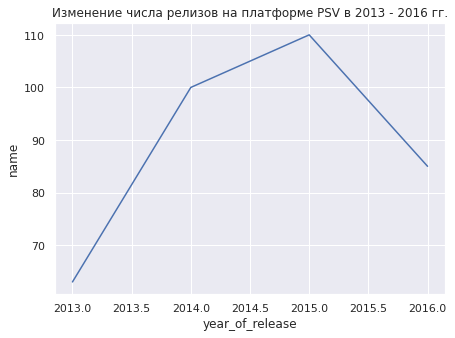

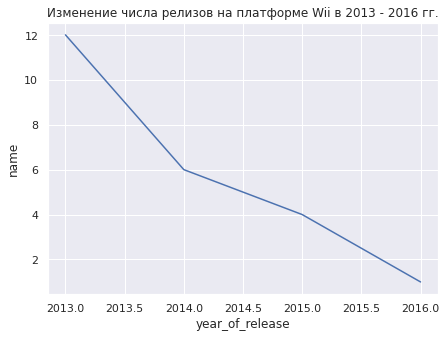

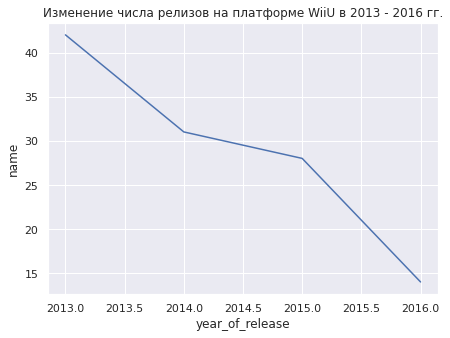

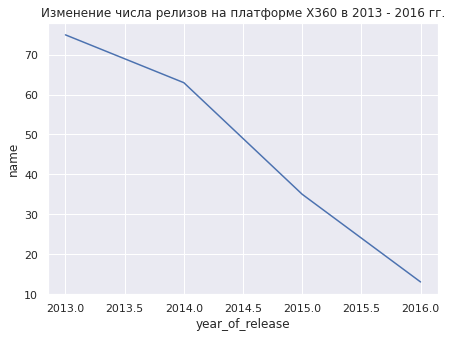

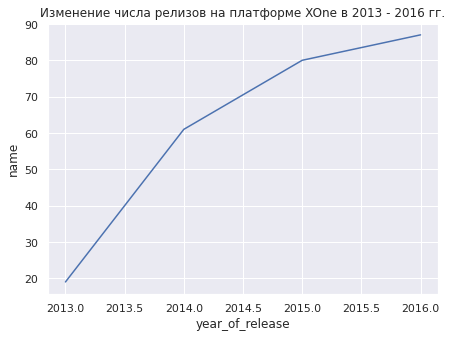

In [148]:
dfww = dfw.query('year_of_release > 2012').groupby(['platform', 'year_of_release'], as_index = False).agg({'name':'count'})
for i in dfww['platform'].unique():
    dfh = dfww.loc[dfww['platform'] == i]
    plt.figure(figsize=(7, 5))
    sns.lineplot(x = 'year_of_release', y = 'name', data = dfh)
    plt.title('Изменение числа релизов на платформе {} в 2013 - 2016 гг.'.format(i))
    plt.show()

<div class="alert alert-info">
    Из 9 активных платформ, выпускающитх релизы в 2016 г., платформы 3DS, PS3, Wii, WiiU, X360 находятся в стадии снижения числа
релизов, платформы XOne, PS4, PC находятся на стадии роста релизов, а платформа PSV прошла через пик в 2015 г и начала снижение 
числа релизов в 2016 г.
</div>

In [149]:
df16 = dfww.query('year_of_release == 2016 & platform != "PSV"').rename(columns={'name': '2016'}).drop('year_of_release', axis = 1)
df13 = dfww.query('year_of_release == 2013 & platform != "PSV"').rename(columns={'name': 'y_min'}).drop('year_of_release', axis = 1)
df15 = dfww.query('year_of_release == 2015 & platform == "PSV"').rename(columns={'name': 'y_min'}).drop('year_of_release', axis = 1)
df156 = dfww.query('year_of_release == 2016 & platform == "PSV"').rename(columns={'name': '2016'}).drop('year_of_release', axis = 1)
dfq = df13.merge(df16, on = 'platform')
psv = df15.merge(df156, on = 'platform')
dfqw = pd.concat([dfq, psv])
dfqw['quotient'] = (dfqw['2016'] - dfqw['y_min'])/4
dfqw.loc[dfqw['platform'] == 'PSV', 'quotient'] = (dfqw.loc[dfqw['platform'] == 'PSV', '2016'] - dfqw.loc[dfqw['platform'] == 'PSV', 'y_min'])/2
dfqw['forecast_2017'] = dfqw['y_min'] + dfqw['quotient']*5
dfqw.loc[dfqw['platform'] == 'PSV', 'forecast_2017'] = dfqw.loc[dfqw['platform'] == 'PSV', 'y_min'] + dfqw.loc[dfqw['platform'] == 'PSV', 'quotient']*3
dfqw.loc[dfqw['forecast_2017'] < 0, 'forecast_2017'] = 0

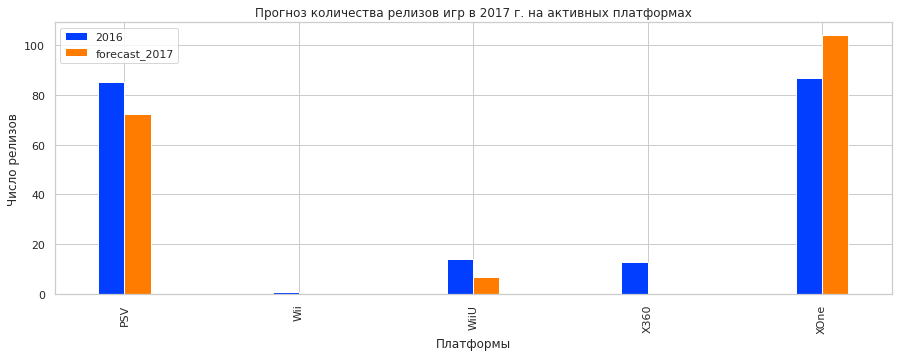

In [150]:
dft = dfqw[['platform','2016', 'forecast_2017']]
dftw = dft.groupby('platform').mean()
sns.set_style('whitegrid')
sns.set_palette('bright')
dftw.plot(kind='bar', width = 0.3, title = 'Прогноз количества релизов игр в 2017 г. на активных платформах',
                                             figsize=(15,5))
plt.xlabel("Платформы")
plt.ylabel("Число релизов"); 

<div class="alert alert-info">
    Произведя линейную аппроксимацию временной зависимости количества релизов, получили прогноз числа релизов в 2017 г с 
разбивкой по активным платформам. 
    Платформы PC, PS4 и XOne демонстрируют рост числа новых игр в 2017 г. Релизы игр на остальных платформах в 2017 г.
снижаются, а на платформах Wii и X360 в 2017 г. новых игр, вероятно, не появится.  
</div>

<div class="alert alert-info">
  <b> Прогноз выручки от новых релизов на игровом рынке в 2017 году </b>
    <a id="start13"></a> 

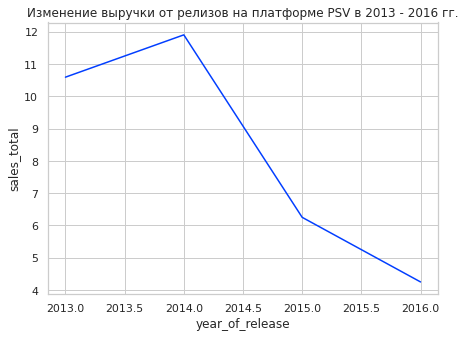

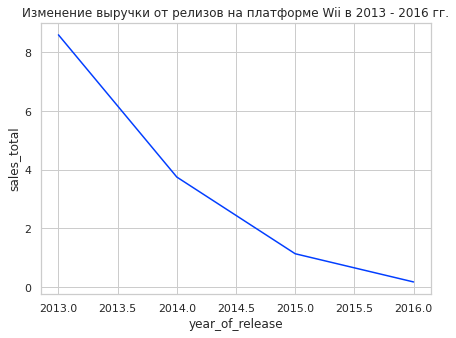

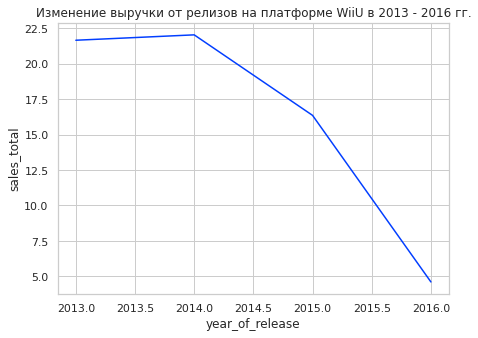

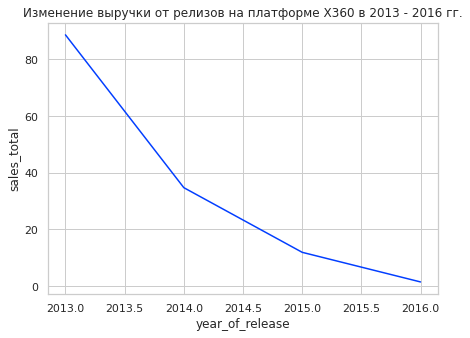

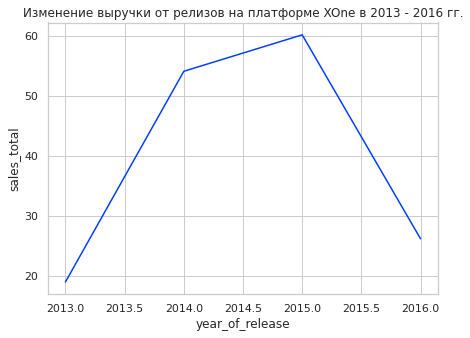

In [151]:
dfww = dfw.query('year_of_release > 2012').groupby(['platform', 'year_of_release'], as_index = False).agg({'sales_total':'sum'})
for i in dfww['platform'].unique():
    dfh = dfww.loc[dfww['platform'] == i]
    plt.figure(figsize=(7, 5))
    sns.lineplot(x = 'year_of_release', y = 'sales_total', data = dfh)
    plt.title('Изменение выручки от релизов на платформе {} в 2013 - 2016 гг.'.format(i))
    plt.show()

<div class="alert alert-info">
    Все 9 активных платформ, выпускающих релизы в 2016 г., находятся в стадии понижения выручки от новых (ежегодных) релизов, 
что вполне закономерно, так как у релизов, выходящих в каждом последующем году остается меньше времени для набора выручки, 
чем для релизов, вышедших в предыдущем году.  Платформы XOne и PS4 прошли через пик в 2015 г и начали снижение объемов выручки от
игр, выпущенных в 2016 г.
</div>

In [152]:
df16 = dfww.query('year_of_release == 2016 & platform != "PS4" & platform != "XOne"').rename(columns={'sales_total': '2016'}).drop('year_of_release', axis = 1)
df13 = dfww.query('year_of_release == 2013 & platform != "PS4" & platform != "XOne"').rename(columns={'sales_total': 'y_min'}).drop('year_of_release', axis = 1)
df15 = dfww.query('year_of_release == 2015 & (platform == "PS4" | platform == "XOne")').rename(columns={'sales_total': 'y_min'}).drop('year_of_release', axis = 1)
df156 = dfww.query('year_of_release == 2016 & (platform == "PS4" | platform == "XOne")').rename(columns={'sales_total': '2016'}).drop('year_of_release', axis = 1)
dfq = df13.merge(df16, on = 'platform')
psv = df15.merge(df156, on = 'platform')
dfqw = pd.concat([dfq, psv])
dfqw['quotient'] = (dfqw['2016'] - dfqw['y_min'])/4
dfqw.loc[dfqw['platform'] == 'PS4', 'quotient'] = (dfqw.loc[dfqw['platform'] == 'PS4', '2016'] - dfqw.loc[dfqw['platform'] == 'PS4', 'y_min'])/2
dfqw.loc[dfqw['platform'] == 'XOne', 'quotient'] = (dfqw.loc[dfqw['platform'] == 'XOne', '2016'] - dfqw.loc[dfqw['platform'] == 'XOne', 'y_min'])/2
dfqw['forecast_2017'] = dfqw['y_min'] + dfqw['quotient']*5
dfqw.loc[dfqw['platform'] == 'PS4', 'forecast_2017'] = dfqw.loc[dfqw['platform'] == 'PS4', 'y_min'] + dfqw.loc[dfqw['platform'] == 'PS4', 'quotient']*3
dfqw.loc[dfqw['platform'] == 'XOne', 'forecast_2017'] = dfqw.loc[dfqw['platform'] == 'XOne', 'y_min'] + dfqw.loc[dfqw['platform'] == 'XOne', 'quotient']*3
dfqw.loc[dfqw['forecast_2017'] < 0, 'forecast_2017'] = 0

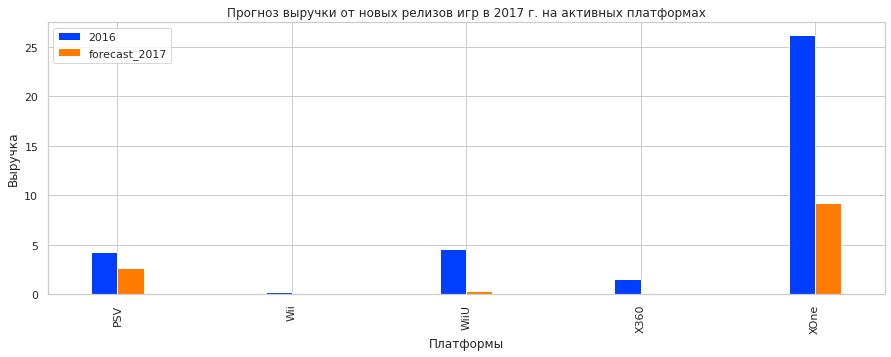

In [153]:
dft = dfqw[['platform','2016', 'forecast_2017']]
dftw = dft.groupby('platform').mean()
sns.set_style('whitegrid')
sns.set_palette('bright')
dftw.plot(kind='bar', width = 0.3, title = 'Прогноз выручки от новых релизов игр в 2017 г. на активных платформах',
                                             figsize=(15,5))
plt.xlabel("Платформы")
plt.ylabel("Выручка"); 

<div class="alert alert-info">
    Исходя из линейной аппроксимации изменения выручки от ежегодных релизов, можно сделать вывод, о том, что выручка от релизов
игр 2017 году на всех активных платформах будет ниже, чем от игр, выпущенных в 2016 г. Это частично связано с общим
снижением выручки на игровом рынке, что выражается в прогнозируемом снижении количества релизов в 2016 - 2017 гг на большинстве
платформ. 
    Выручка от платформ Wii и X360 в 2017 г. будет близка к нулю, что коррелирует с прогнозируемым отсутствием релизов на этих 
платформах. На платформах PS3 и WiiU выручка будет хоть и низкой, но все же не нулевой, так как релизы на этих платформах 
в 2017 г будут выходить. Основная выручка от игр с релизом в 2017 г. будет поступать от платформ PS4 и XOne, на которых
спрогнозирован рост числа релизов.
   Некоторое разночтение с между прогнозами числа релизов игр в 2017 г. и выручки от их реализации связано с тем, что мы 
имеем дело с данными об интегральной выручке от каждой игры без разбивки по ежегодным продажам. Поэтому в 2017 г. интегральная
выручка от каждой игры, соответственно, увеличится, что приведет к перераспределению выручки между платформами и более точной
корреляции между выручкой и фактическим количеством реализованных игр на каждой платформе.
</div>